<a href="https://colab.research.google.com/github/VrolixThomas/Analyse1/blob/main/Analyse1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyse 1: statistieken



In [ ]:
#Base file path
Basepath = "drive/My Drive/Analyse1/"

In [ ]:
#De gegevens van Toledo staan in de vorm datum;activiteiten;studenten
#Zodat de gegevens verder verwerkt kunnen worden willen we comma seperated values, dus ; moet een , worden
#Hiernaast willen we ze in het format jaar-maand-dag,activiteiten,studenten
def changeToCSV(rawinput, output):
  #input file
  fin = open(rawinput, "rt")
  #output file to write the result to
  fout = open(f"{Basepath}{output}", "wt")
  #for each line in the input file
  first = True
  for line in fin:
	#read replace the string and write to output file
    counter = 0
    index = 0
    date = []
    if not first:
      date.append(line[0:2])
      date.append(line[3:5])
      date.append(line[6:10])
      line = date[2] + "-" + date[1] + "-" + date[+0] + line[10:]
      if int(date[1]) > 1 and int(date[1]) < 9:
        line = "" 
    first = False
    
    fout.write(line.replace(';', ','))
    
    
  #close input and output files
  fin.close()
  fout.close()

#Plotten van data, testfase


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
def plotter(path, name):
  #read data from csv
  data = pd.read_csv(path, usecols=['datum','studenten'], parse_dates=['datum'])
  #set date as index
  data.set_index('datum',inplace=True)

  #set ggplot style
  plt.style.use('ggplot')

  #plot data
  fig, ax = plt.subplots(figsize=(15,7))
  ax.bar(data.index, data['studenten'], label='studenten')

  #set ticks every week
  ax.xaxis.set_major_locator(mdates.WeekdayLocator())
  #format date
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

  ax.set_title(name)
  ax.set_ylabel('Count')
  ax.set_xlabel('Datum')
  ax.legend()

def nameWithoutExtention(file):
  return file[:len(file)-4]


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
#Gebruik voor het simultaan plotten van de studentenweergave van een opgave en oplossing.
def plotterOpgaveOplossing(path, path2, name):
  #read data from csv
  data = pd.read_csv(path, usecols=['datum','studenten'], parse_dates=['datum'])
  data2 = pd.read_csv(path2, usecols=['datum','studenten'], parse_dates=['datum'])
  #set date as index
  data.set_index('datum',inplace=True)
  data2.set_index('datum',inplace=True)

  #set ggplot style
  plt.style.use('ggplot')

  #plot data
  width = 0.4 
  fig, ax = plt.subplots(figsize=(15,7))
  #ax.bar(data.index, data['studenten'])

  rects1 = ax.bar(data.index  , data['studenten'], 2*width, label='Opgave')
  rects2 = ax.bar(data2.index , data2['studenten'], width, label='Oplossing')

  #set ticks every week
  ax.xaxis.set_major_locator(mdates.WeekdayLocator())
  #format date
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

  ax.set_title(name)
  ax.set_ylabel('Count')
  ax.set_xlabel('Datum')
  ax.legend()

def nameWithoutExtention(file):
  return file[:len(file)-4]

In [ ]:
#We willen een functie die een plot maakt van alle gegevens op een bepaalde locatie.
from os import listdir
from os.path import isfile, join

def plotAllAtLocation(location):
  mypath = f"{Basepath}{location}"
  onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

  for file in onlyfiles:
    nameWithoutTxt = nameWithoutExtention(file)
    changeToCSV(f"{mypath}/{file}", f"{location}/csv-files/{nameWithoutTxt}.csv")

  mypath2 = f"{Basepath}{location}/csv-files"
  onlyfiles2 = [f for f in listdir(mypath2) if isfile(join(mypath2, f))]
  #onlyfiles2.remove("Examen januari 2021.csv")
  onlyfiles2.sort()
  

  for file in onlyfiles2:
    plotter(f"{Basepath}{location}/csv-files/{file}", nameWithoutExtention(file))

In [ ]:
def plotAllAtLocationWithDoubles(location, length, prefix):
  mypath = f"{Basepath}{location}"
  onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

  for file in onlyfiles:
    nameWithoutTxt = nameWithoutExtention(file)
    changeToCSV(f"{mypath}/{file}", f"{location}/csv-files/{nameWithoutTxt}.csv")

  mypath2 = f"{Basepath}{location}/csv-files"
  onlyfiles2 = [f for f in listdir(mypath2) if isfile(join(mypath2, f))]
  onlyfiles2.sort()
  
  lenPrefix = len(prefix)
  for file in onlyfiles2:
    if not file[:lenPrefix] == prefix:
      if len(file) != length:
        plotter(f"{Basepath}{location}/csv-files/{file}", nameWithoutExtention(file))
        #pass
      else:
        plotterOpgaveOplossing(f"{Basepath}{location}/csv-files/{file}", f"{Basepath}{location}/csv-files/{prefix}{file}" ,nameWithoutExtention(file))


#Statistieken van de oefeningen-examens

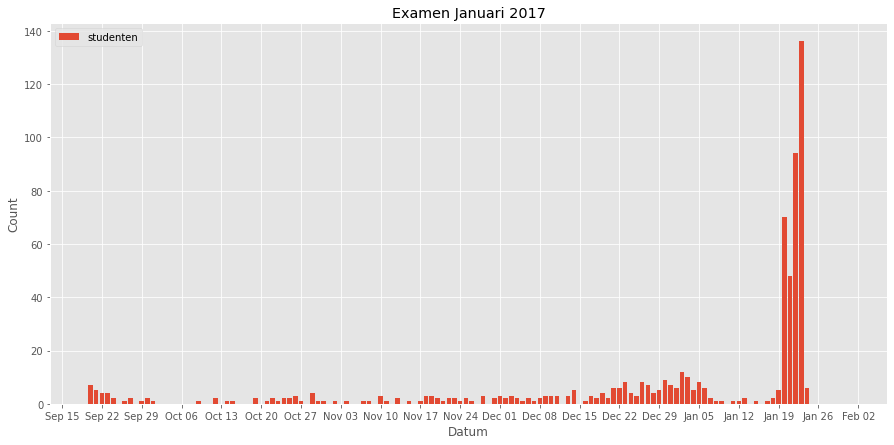

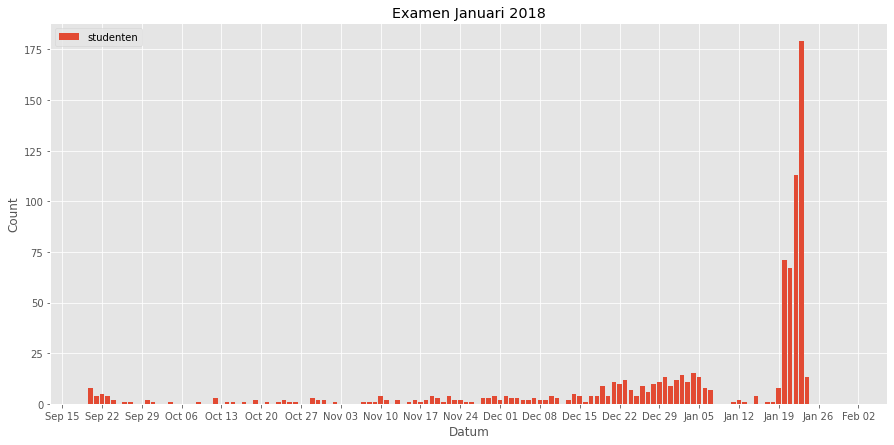

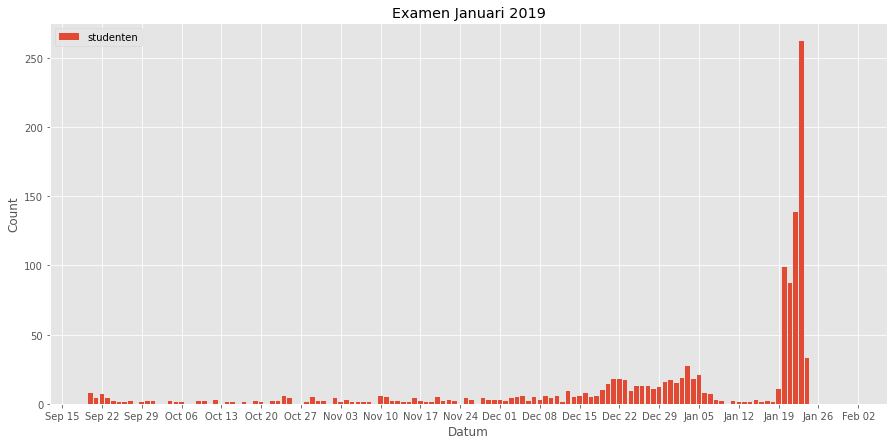

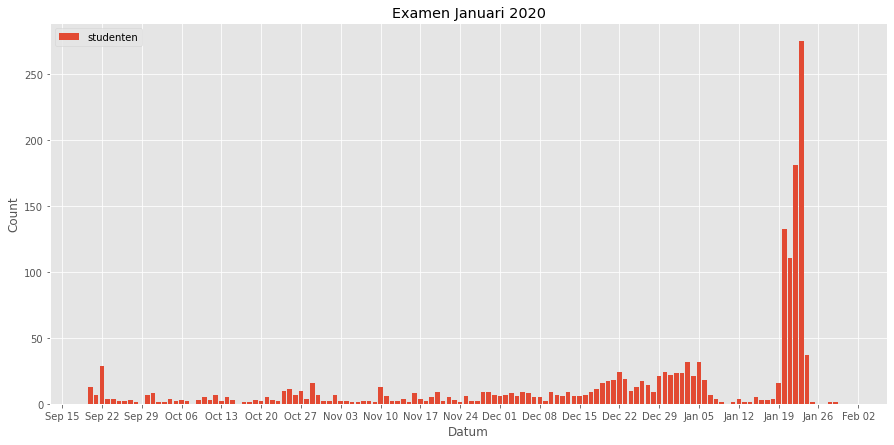

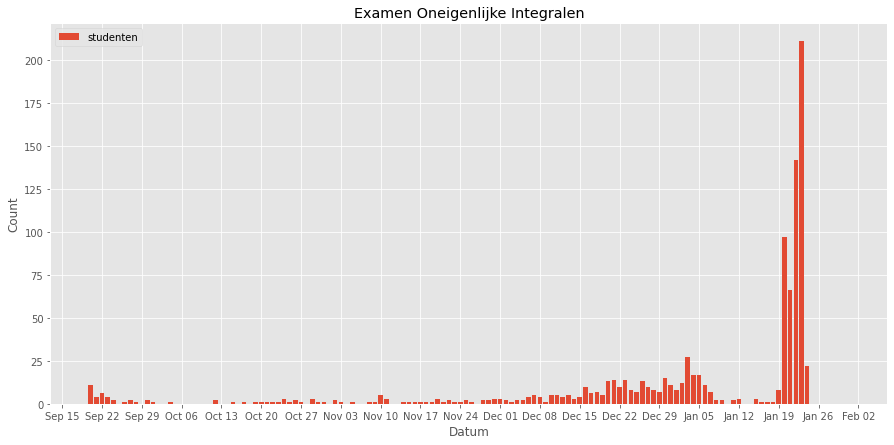

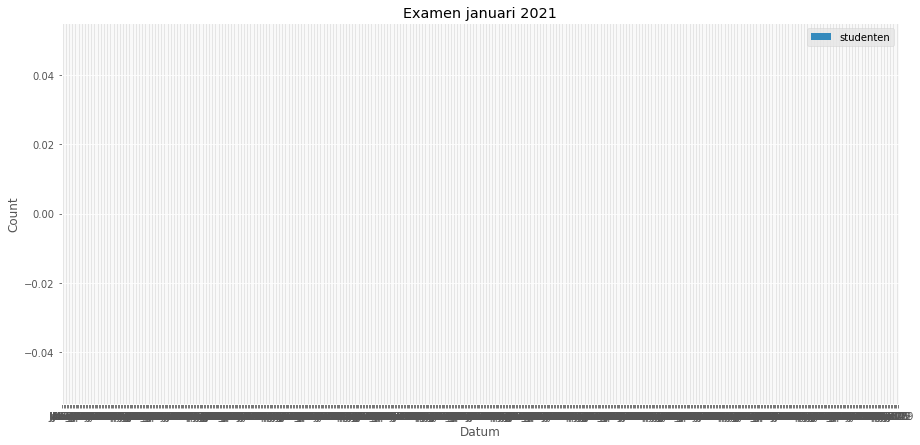

In [ ]:
plotAllAtLocation("Oefeningen-examens")

#Conclusie statistieken Oefeningen-Examens
Doorheen het jaar is er af en toe interesse in de examenvragen. We zien echter dat er gedurende de blok een grotere groep reeds begint met het bekijken van de examenvragen, maar dat de grootste pieken zich voordoen de dagen voor het examen. 

Verder kan vastgesteld worden dat vooral de recentere examens voorrang krijgen bij de studenten alsook de examenvragen in verband met oneigenlijke integralen. De examens van 2020 en 2019 werden op hun piekdag bezocht door meer dan 250 unieke studenten waar de oudere examens rond de 170 en lager zaten.

#Statistieken van de TTT's

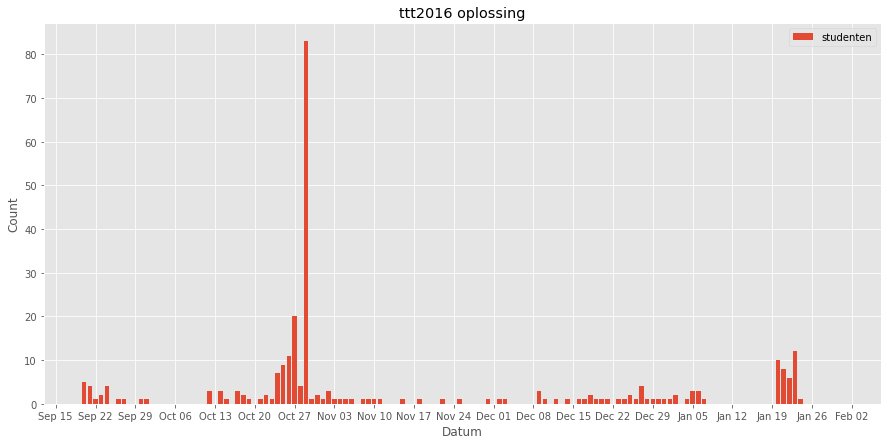

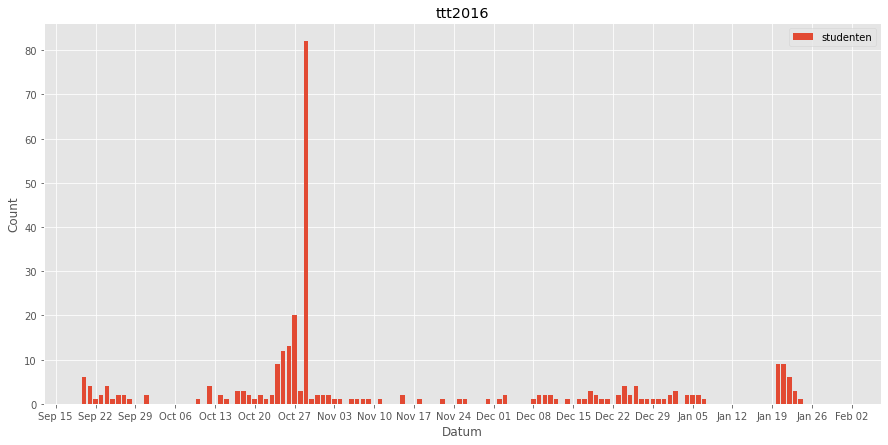

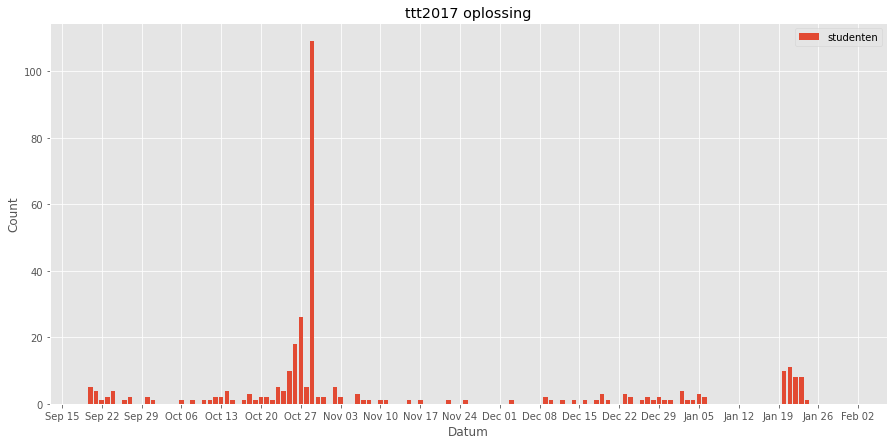

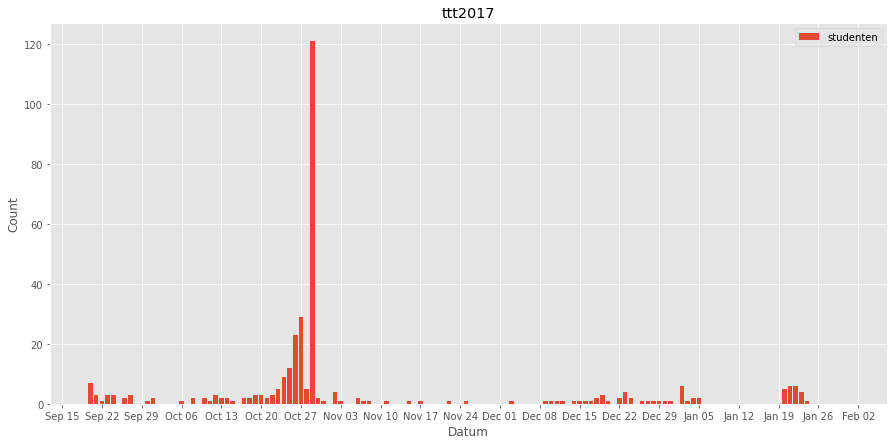

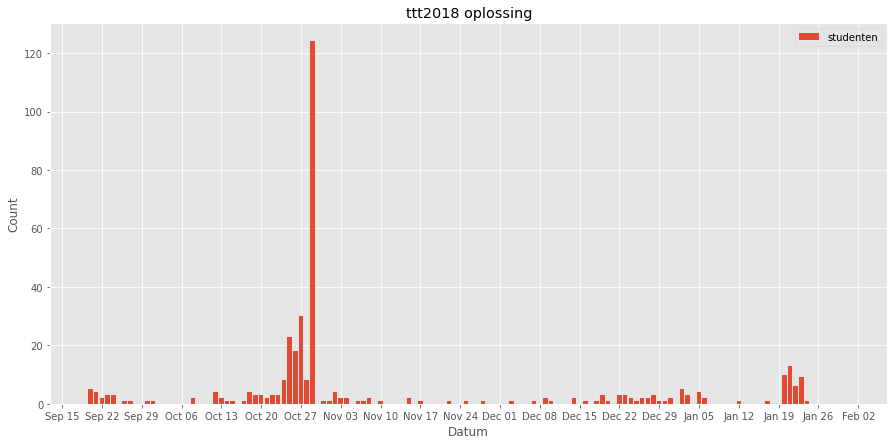

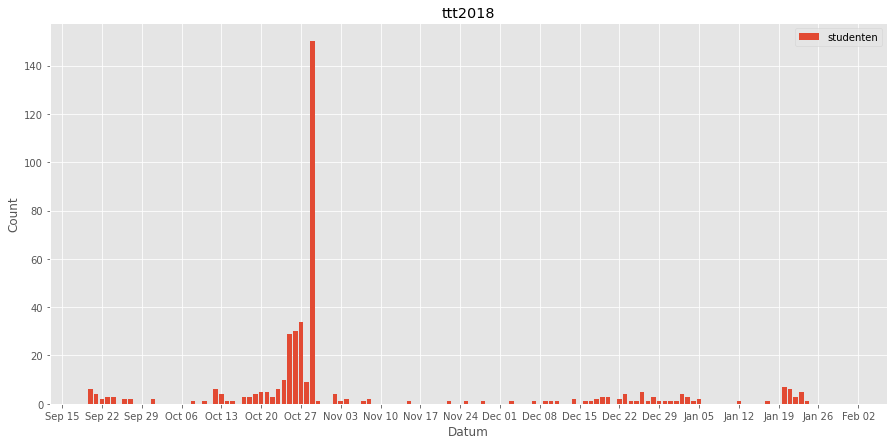

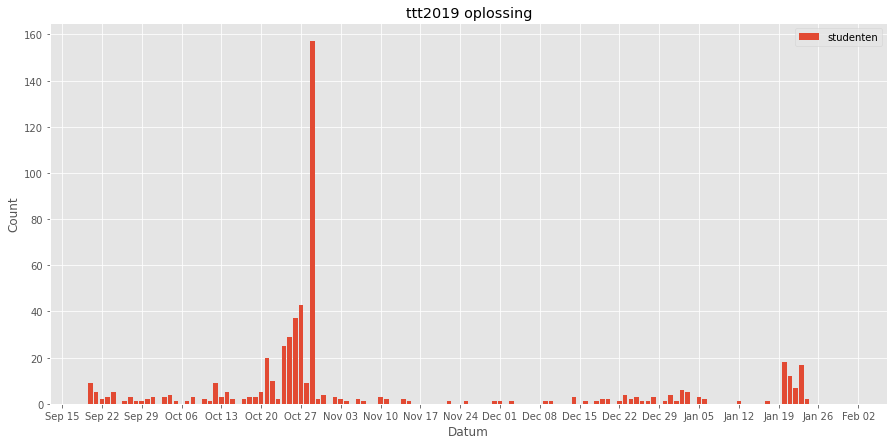

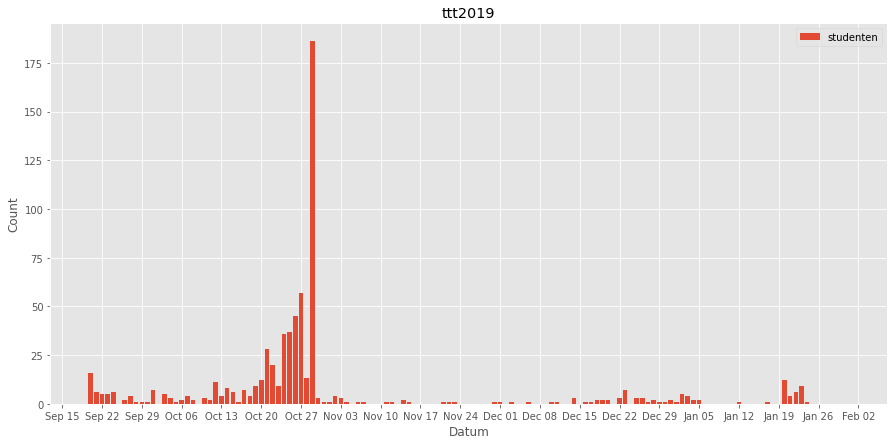

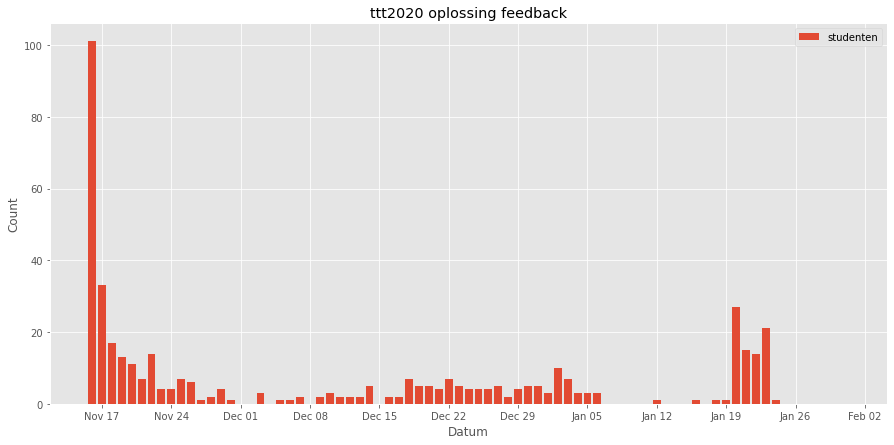

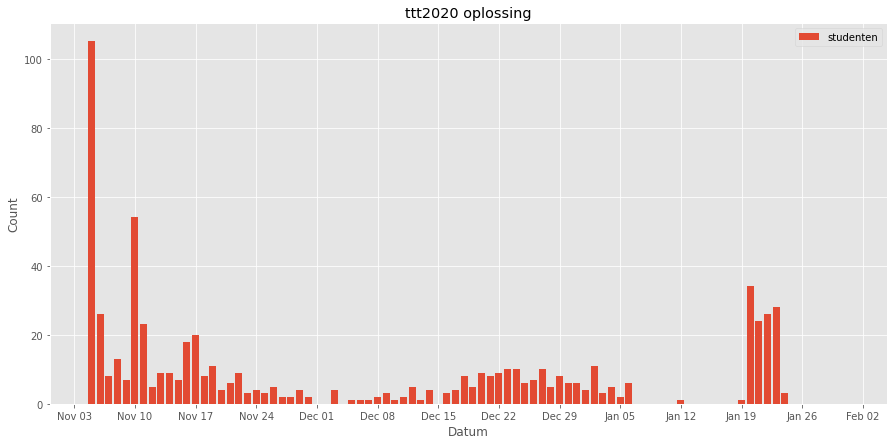

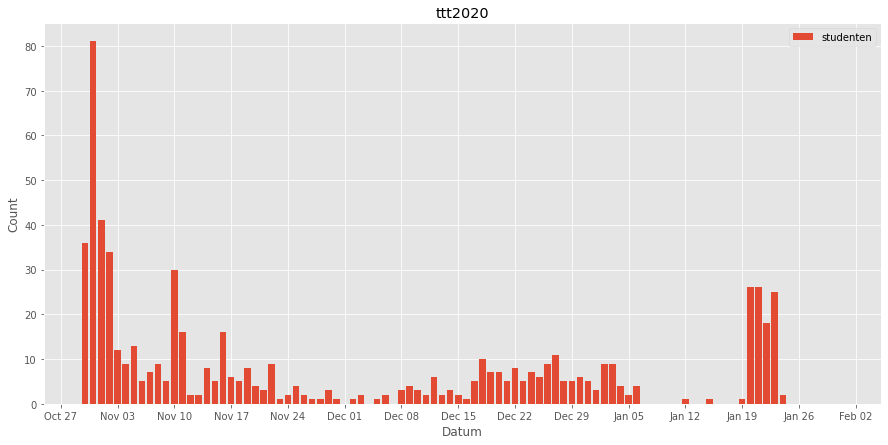

In [ ]:
plotAllAtLocation("Testnamiddag")

#Conclusie statistieken TTT's
Hier kan dezelfde vaststelling gedaan worden als bij de examens, de meer recentere versies krijgen de voorkeur bij de studenten met piekdagen van 80 tot 175 unieke gebruikers voor de oudste en nieuwste TTT's.

Hiernaast valt het op dat de opgave en oplossing niet dezelfde pieken bevatten. Meestal wordt de opgave vaker bezocht dat de oplossing echter is het verschil maar klein en blijkt de grote meerderheid van de studenten beide bronnen te raadplegen.

Er wordt ook vastgesteld dat een klein aantal studenten de TTT's opnieuw raadpleegt in de examenperiode, maar dat dit aandeel slechts zeer klein is in vergelijking met de oude examenvragen. 

Voor de TTT van dit jaar (2020) kan worden vastgesteld dat er weldegelijk een grote interesse is in de oplossing en de feedback.


#Statistieken lesopnames groep A


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control 

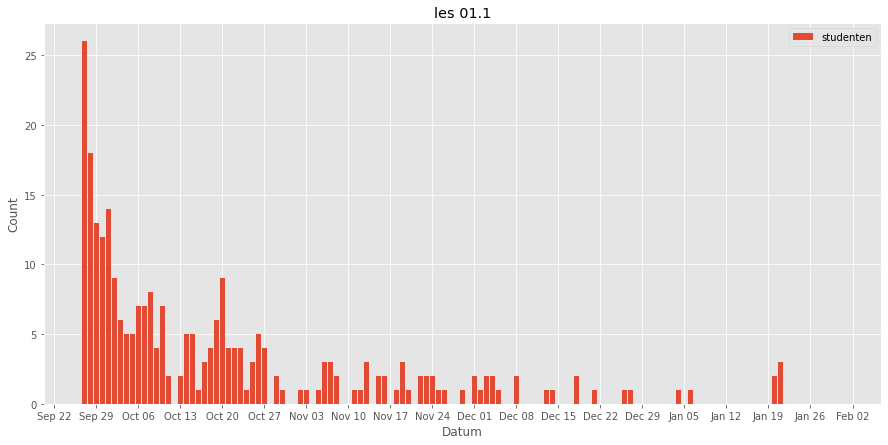

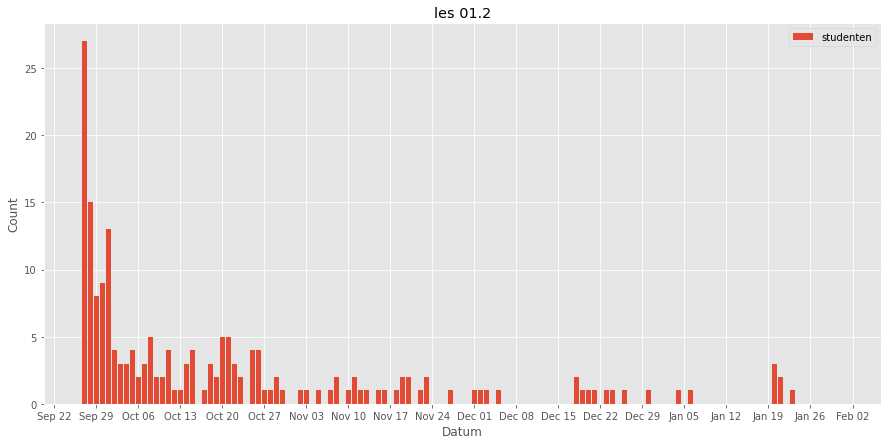

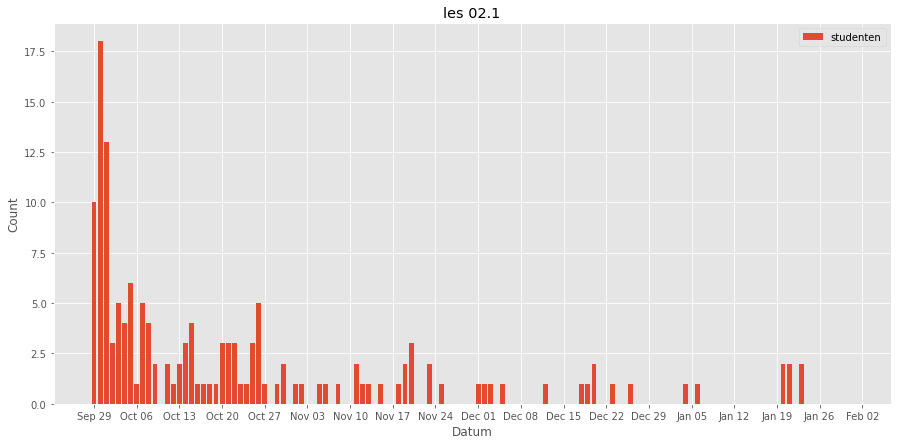

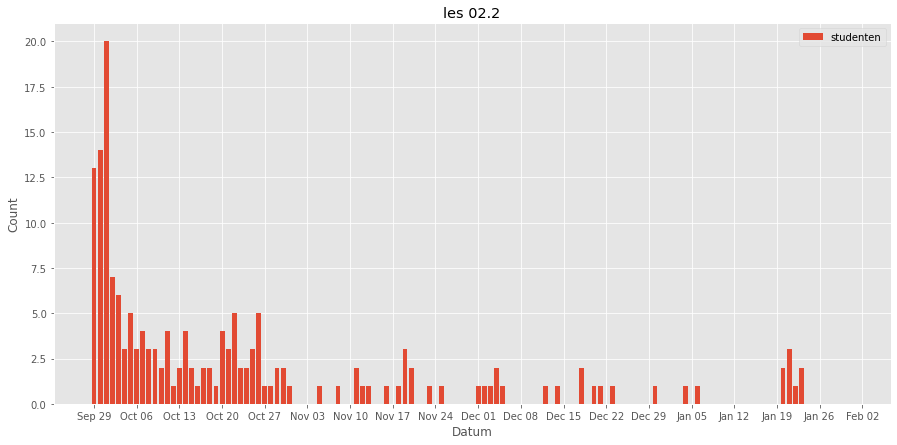

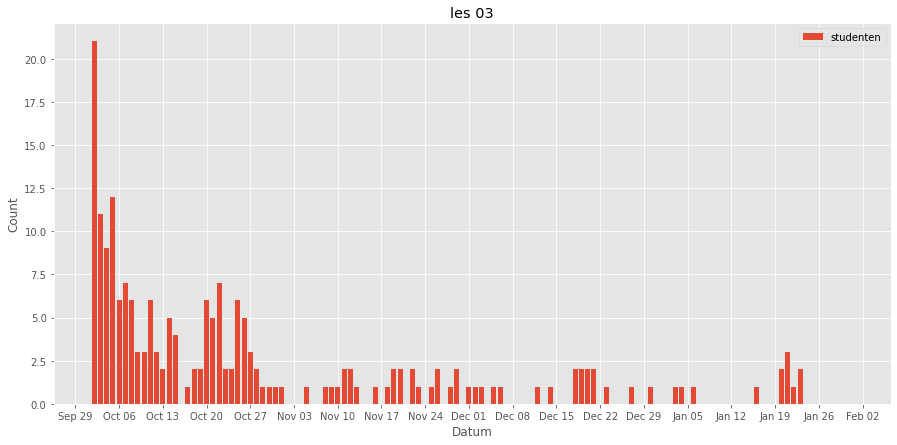

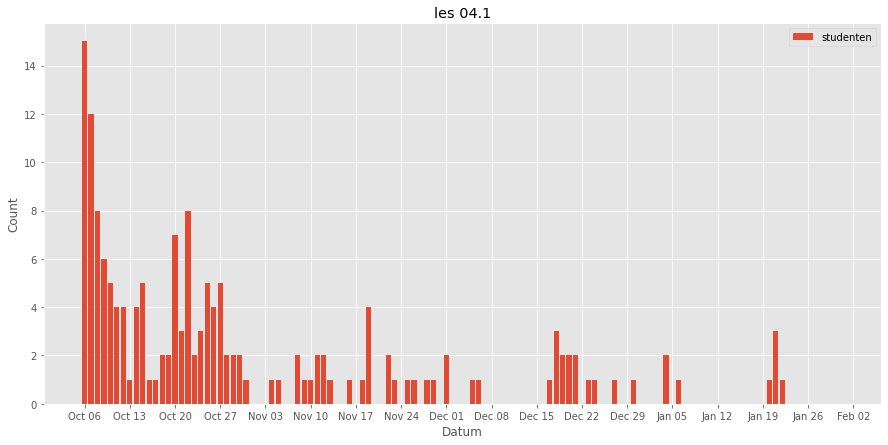

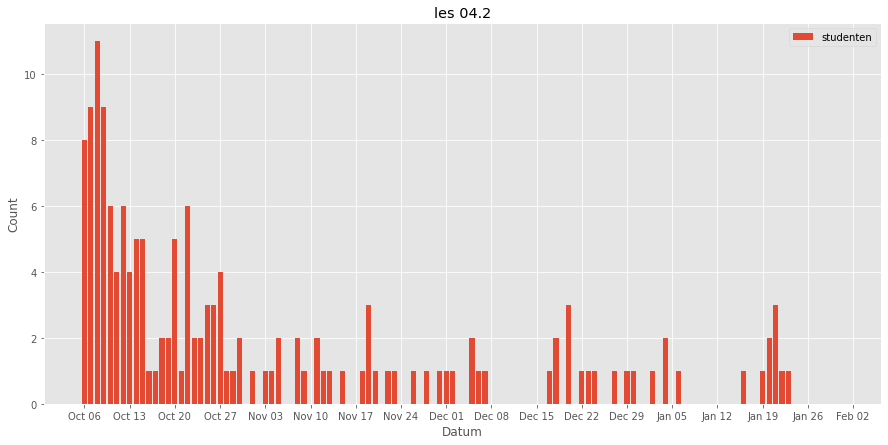

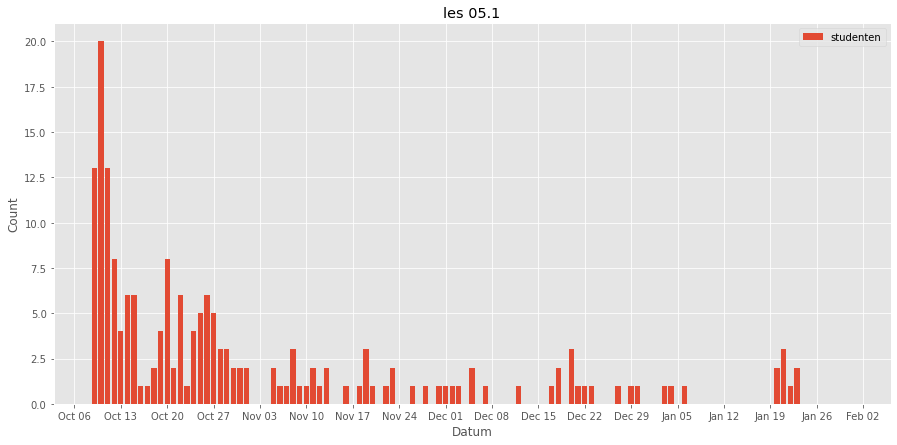

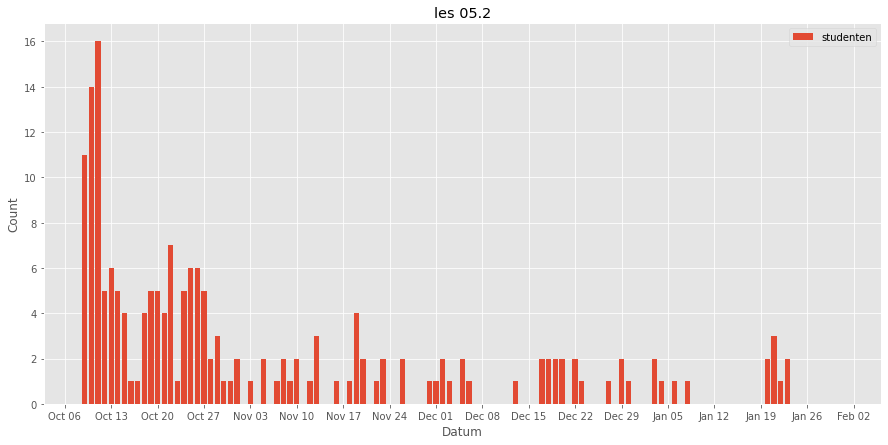

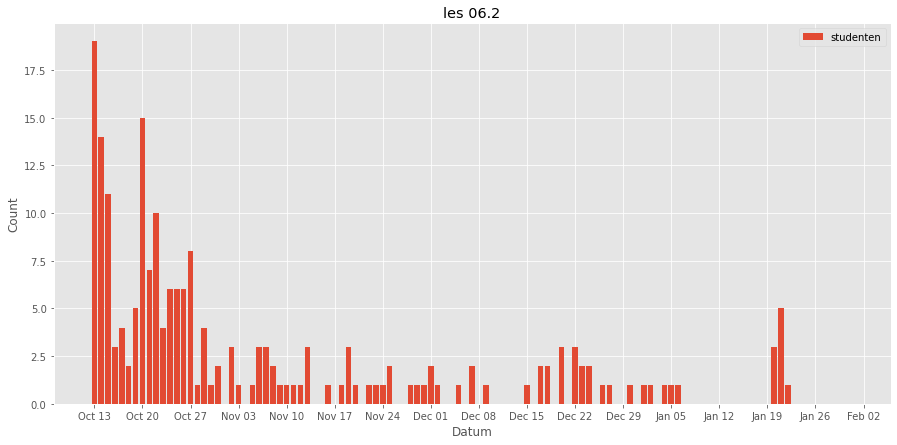

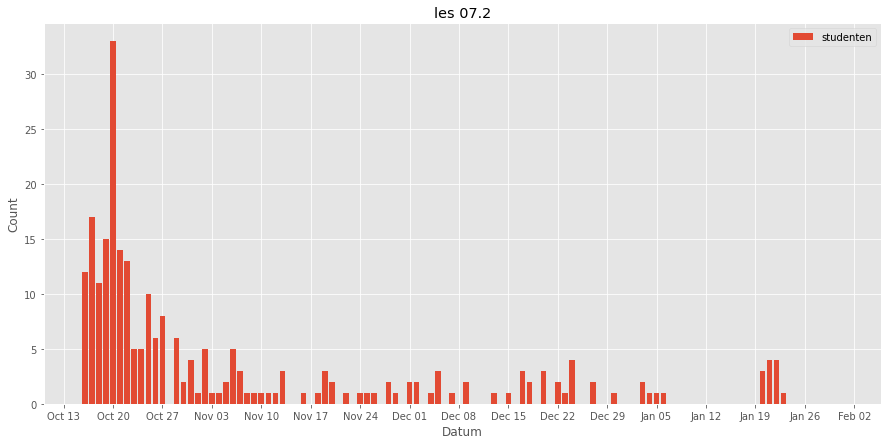

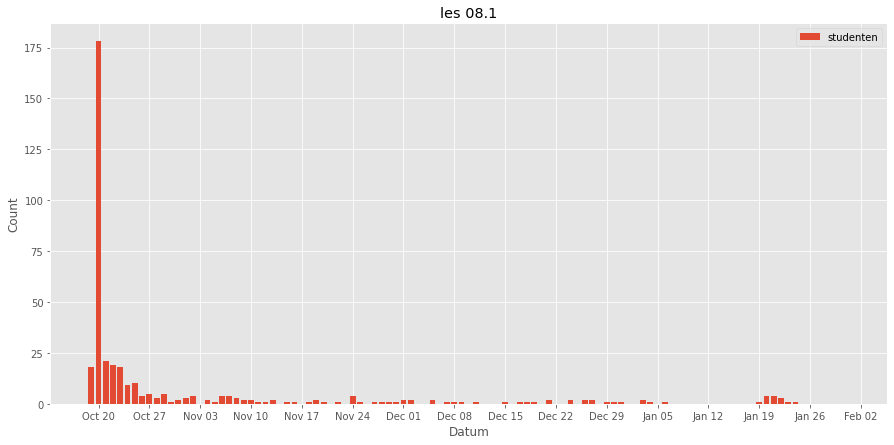

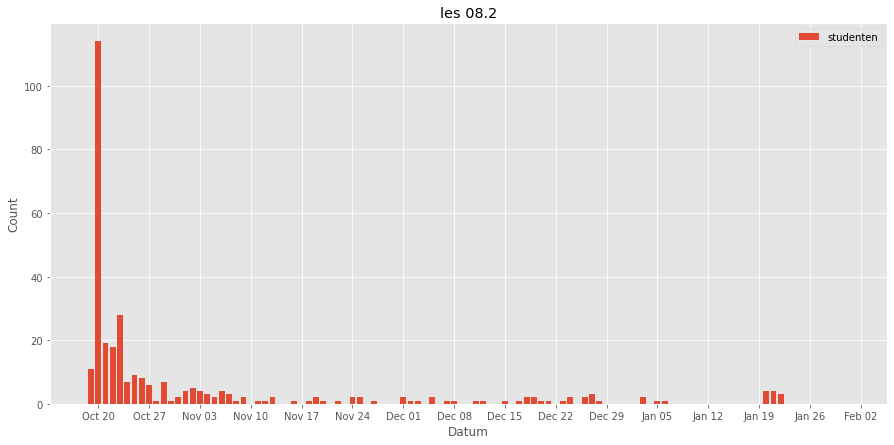

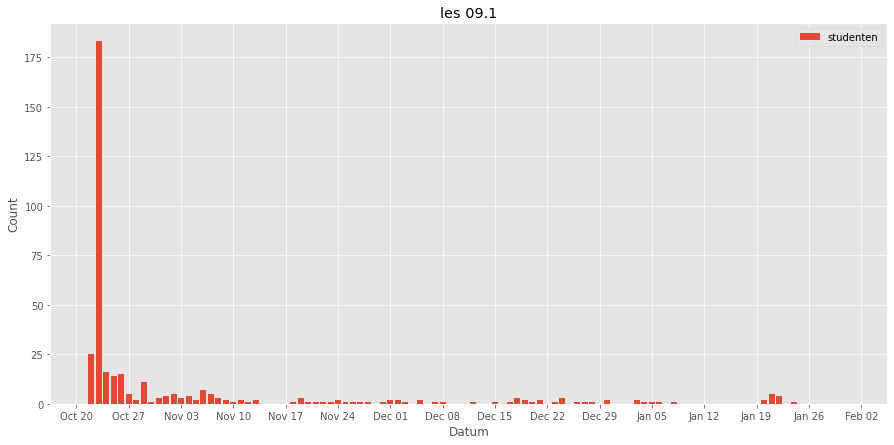

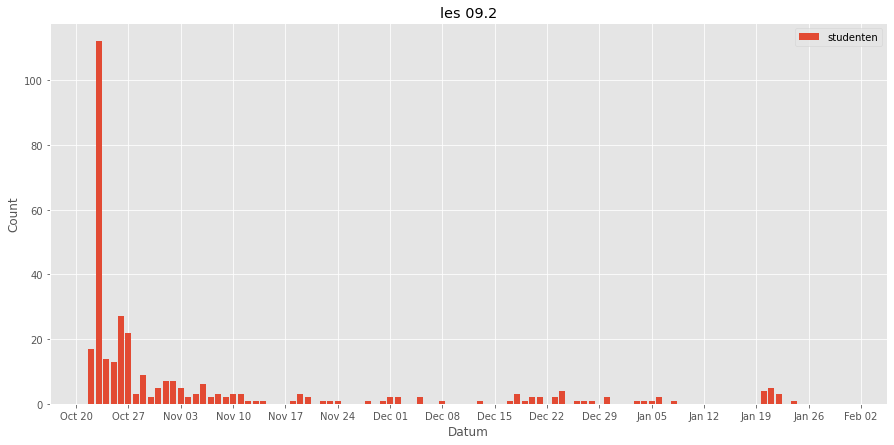

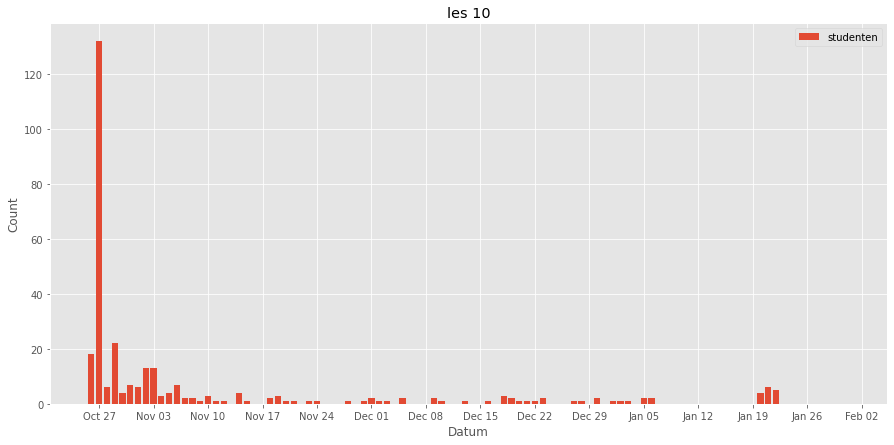

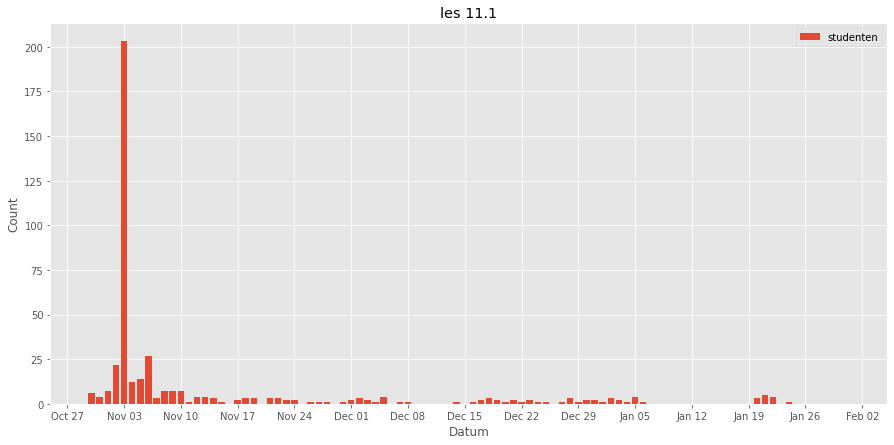

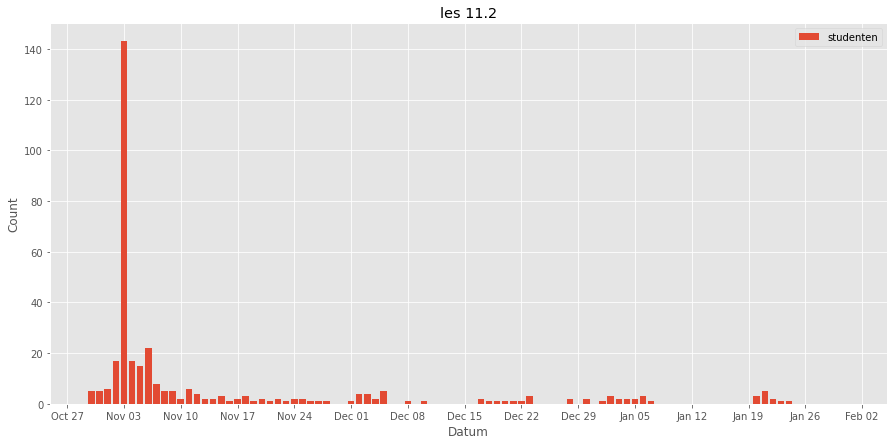

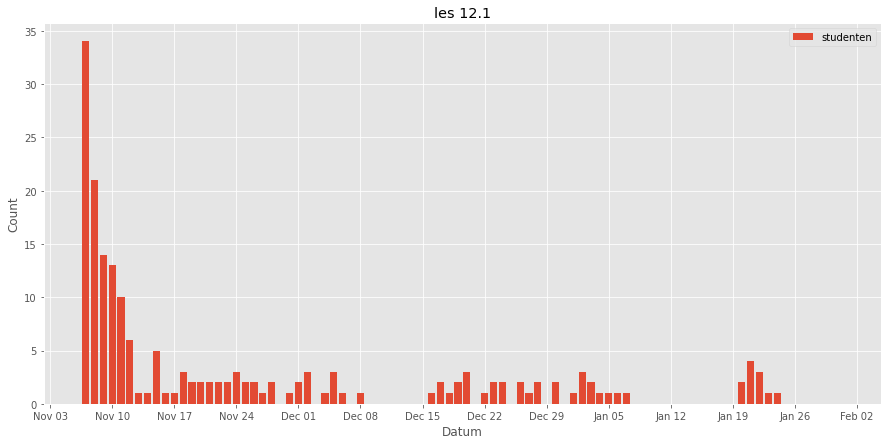

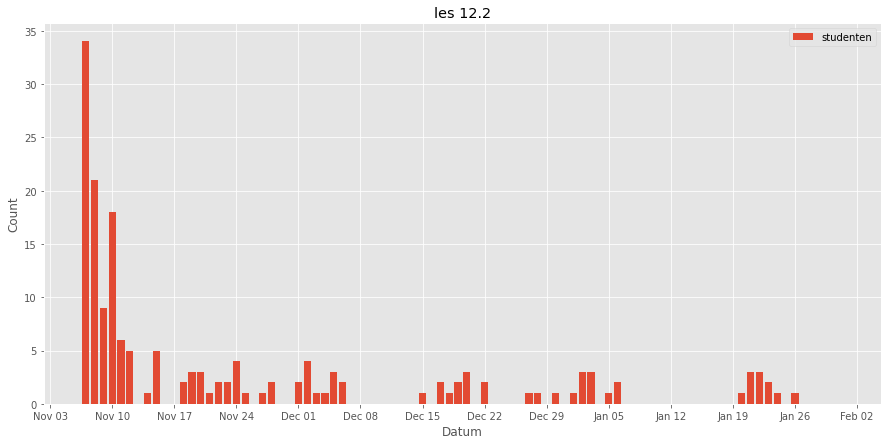

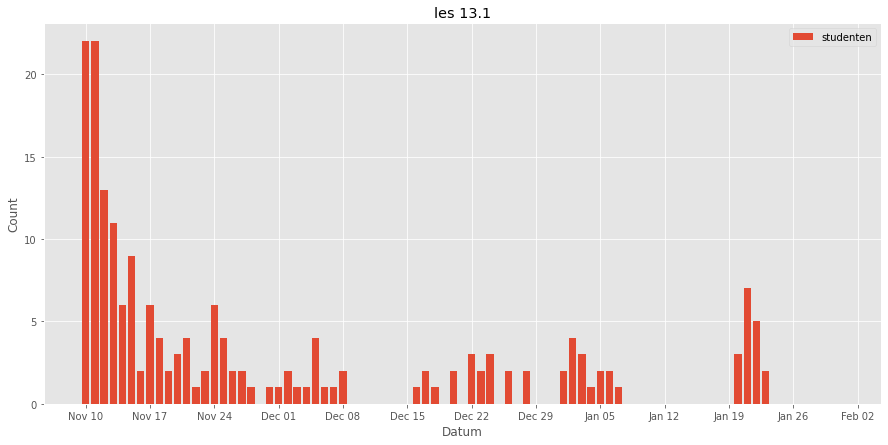

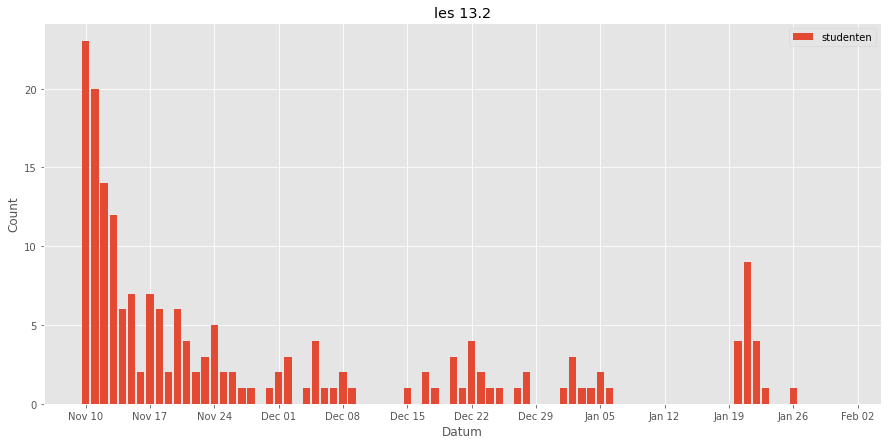

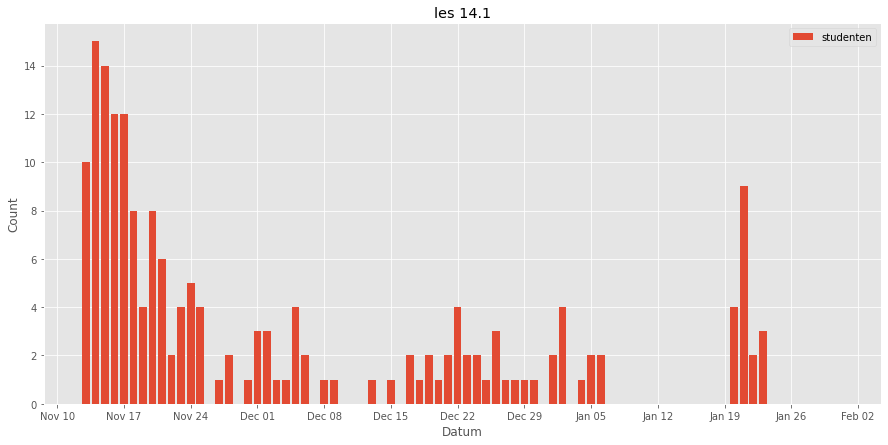

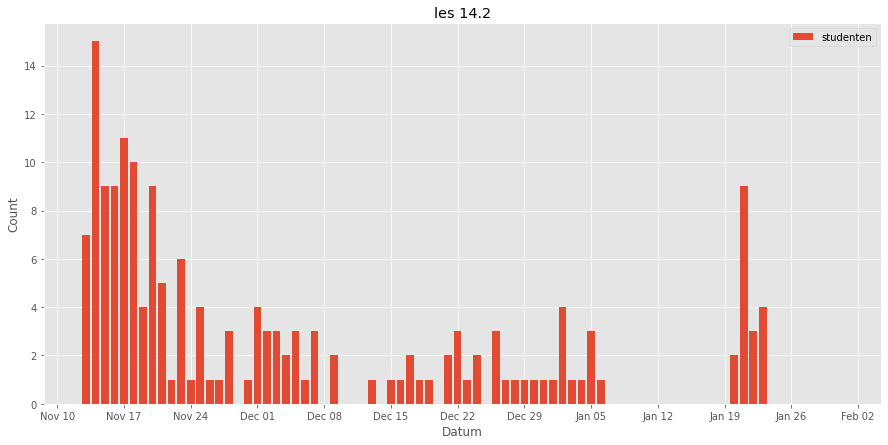

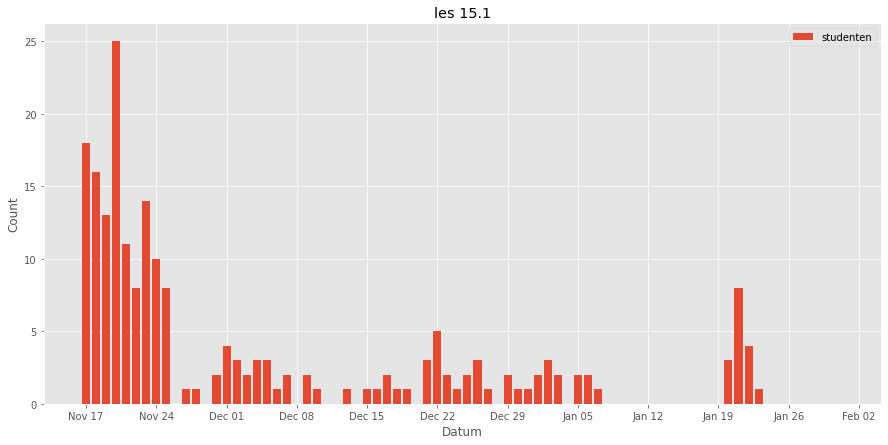

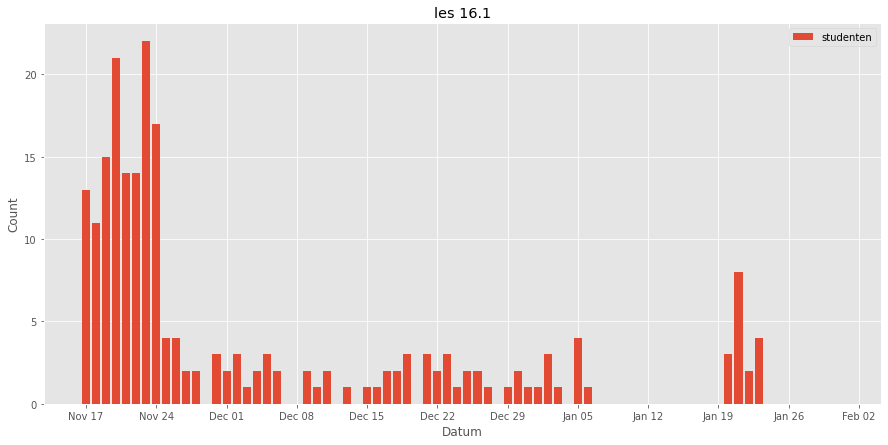

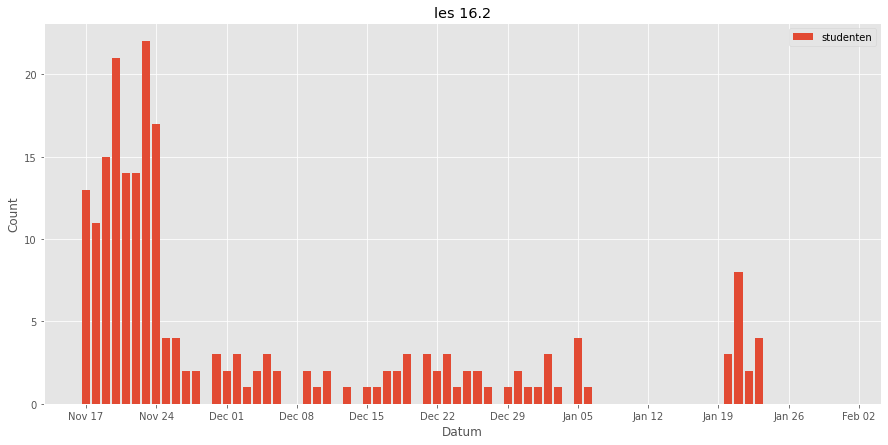

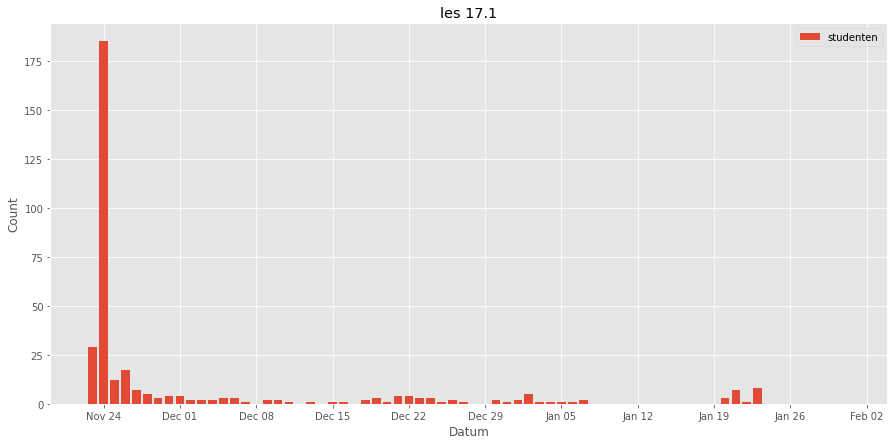

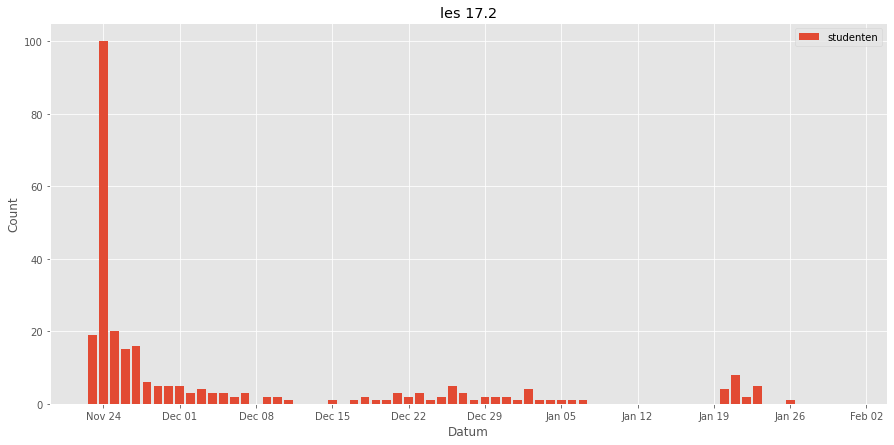

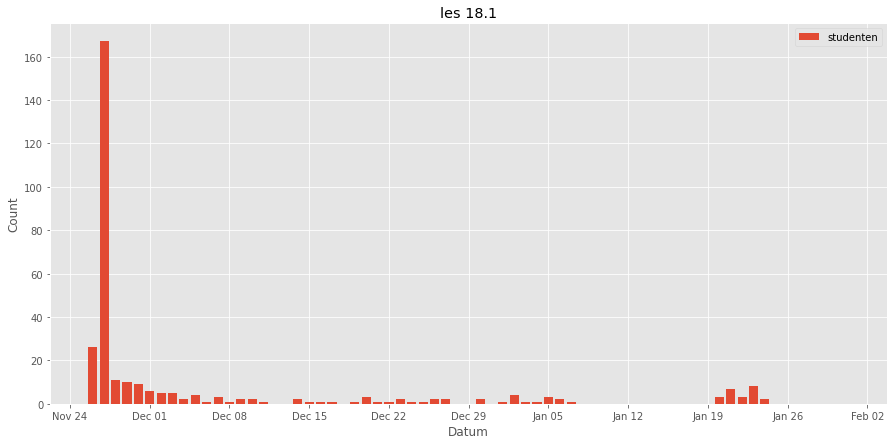

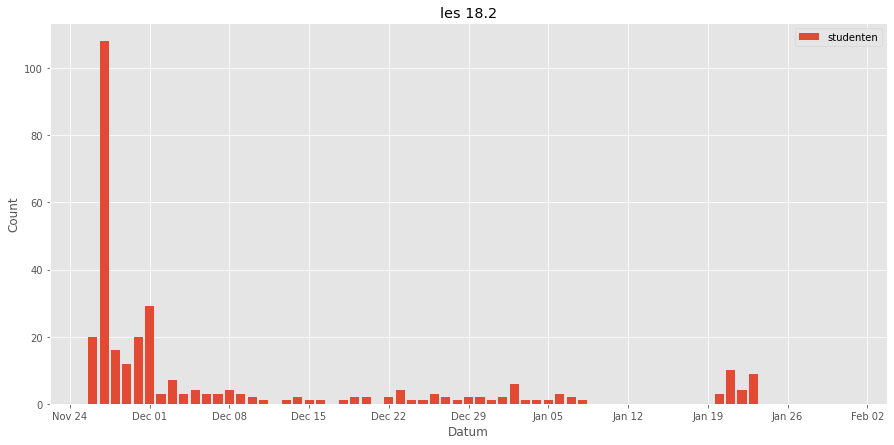

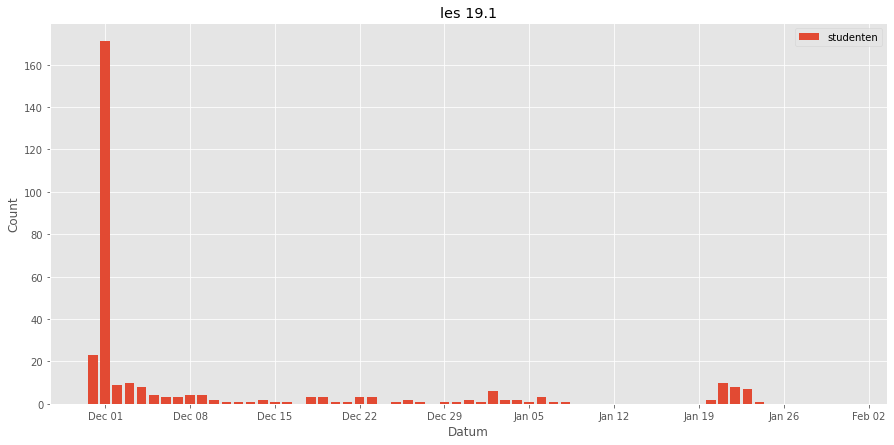

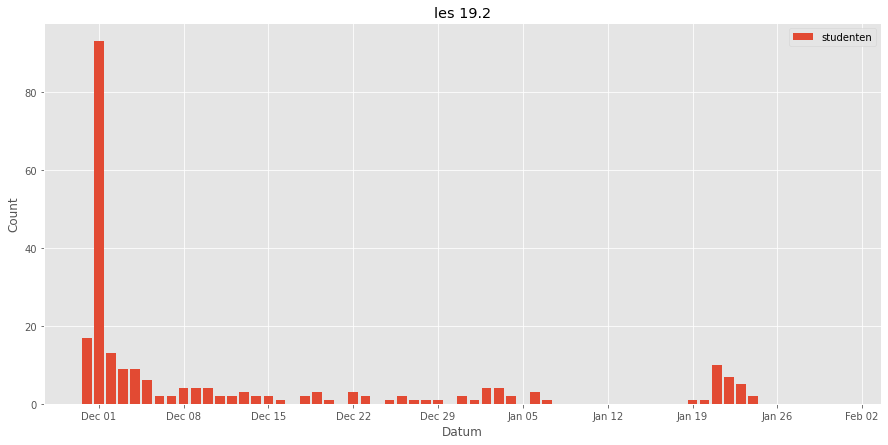

In [ ]:
plotAllAtLocation("Lesopnames/Groep A")

#Conclusies statistieken lesopnames groep A
Voor de meeste lesopnames ligt de piek rond de 20 studenten, echter zijn er sommige opnames waar er 100-200 studenten de lessen bekijken, dit zijn lessen 8-11 en 17-19. Waarom deze lessen aan populariteit winnen is mij niet duidelijk, waren er in deze periode geen fysieke hoorcolleges?

Verder valt het op dat de meeste studenten de opnames bekijken wanneer deze geupload worden, sommige kijken precies uitgesteld doorheen het semester en in de blokperiode en de dagen voor het examen zijn er enkele studenten die de lessen op nieuw bekijken (<10 per dag)

#Statistieken lesopnames groep B + 1 Bira A + B


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control 

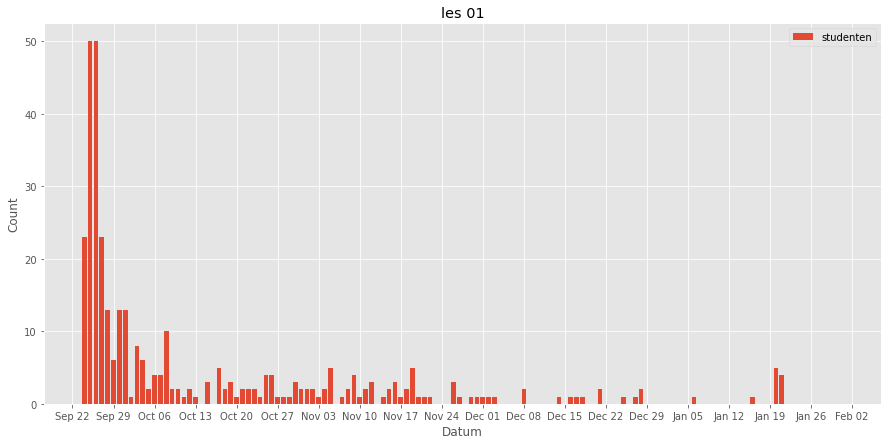

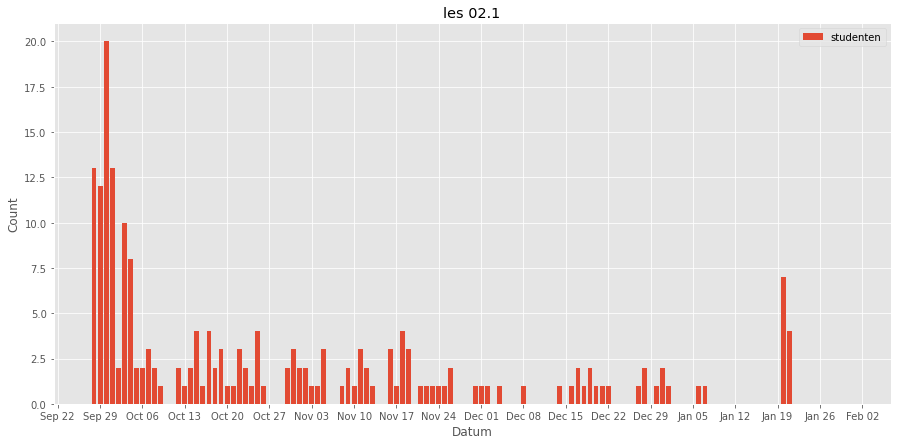

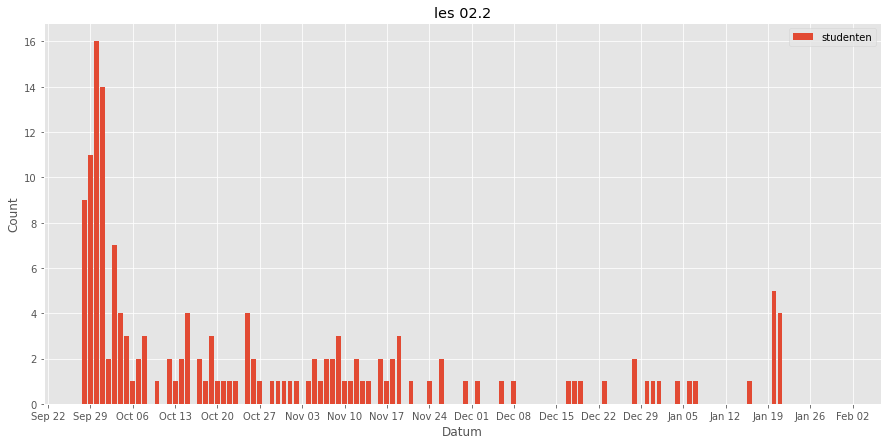

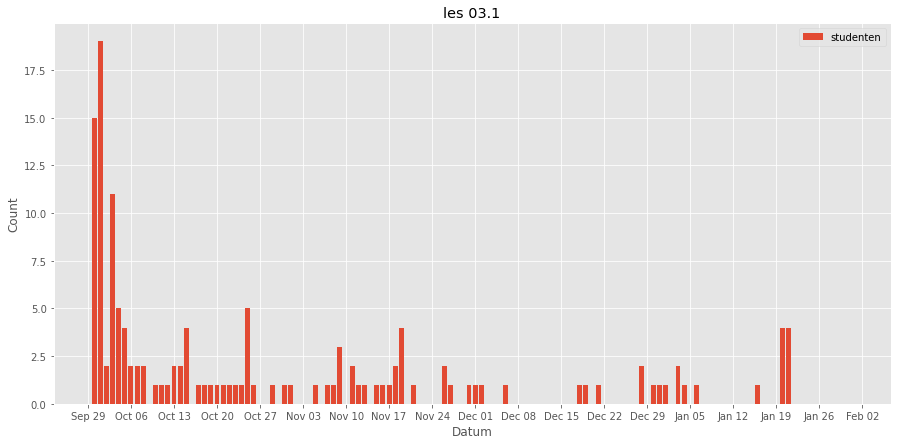

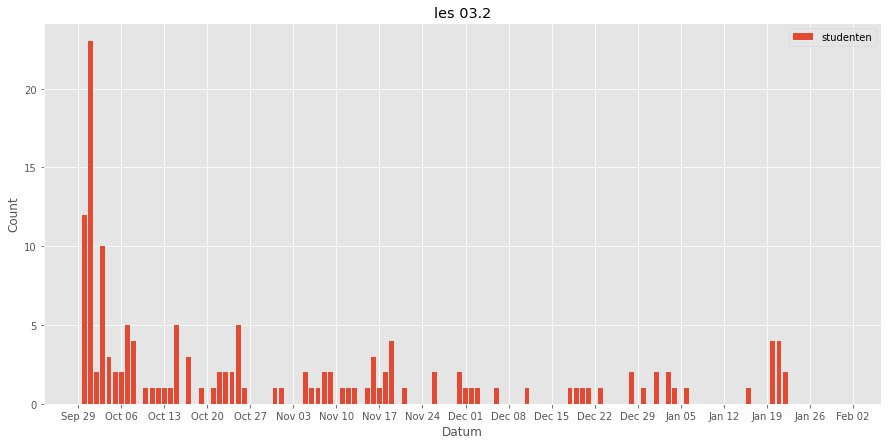

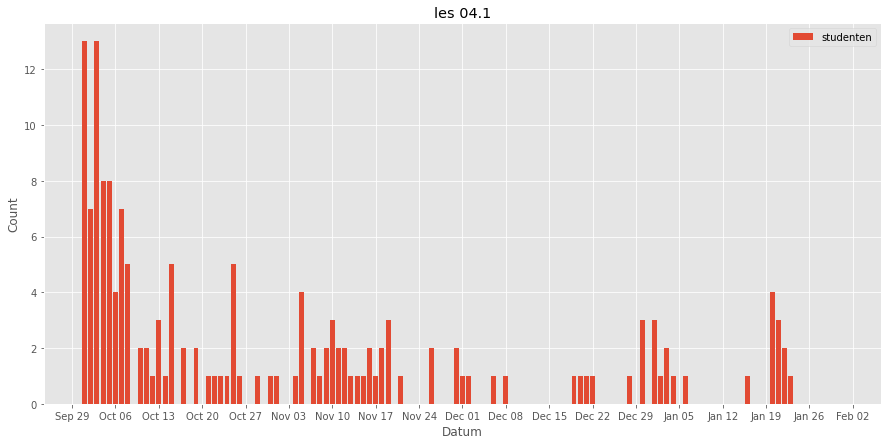

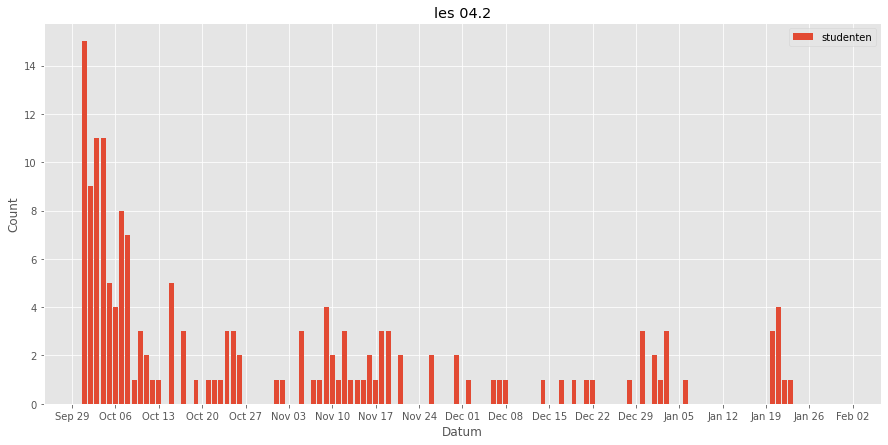

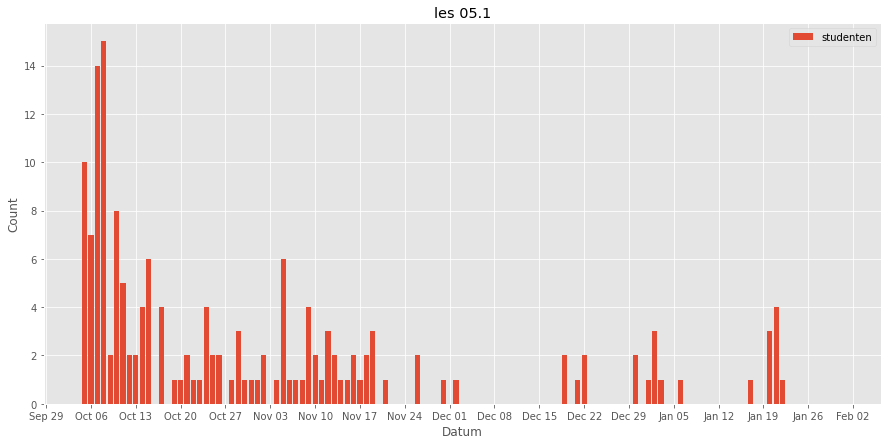

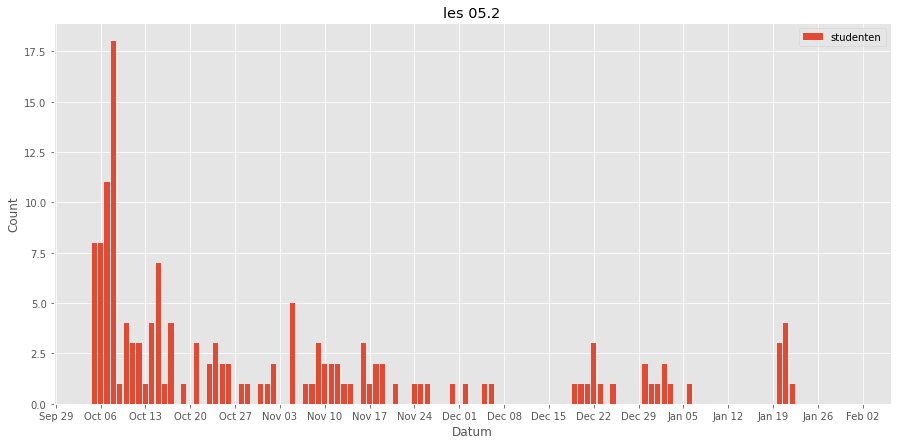

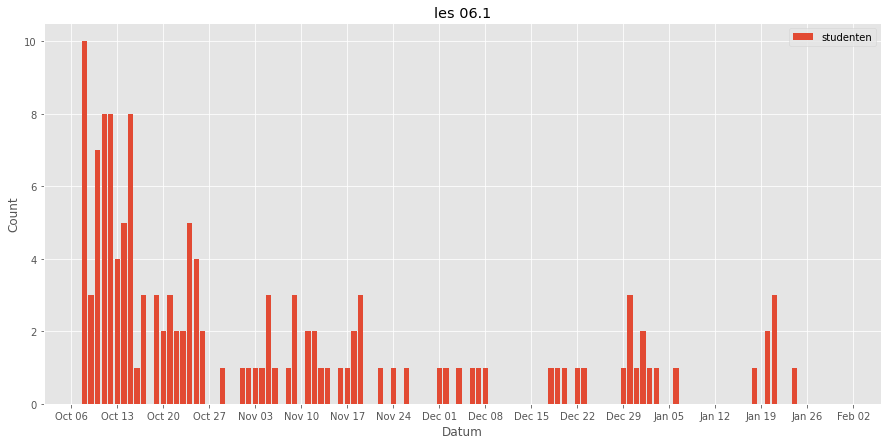

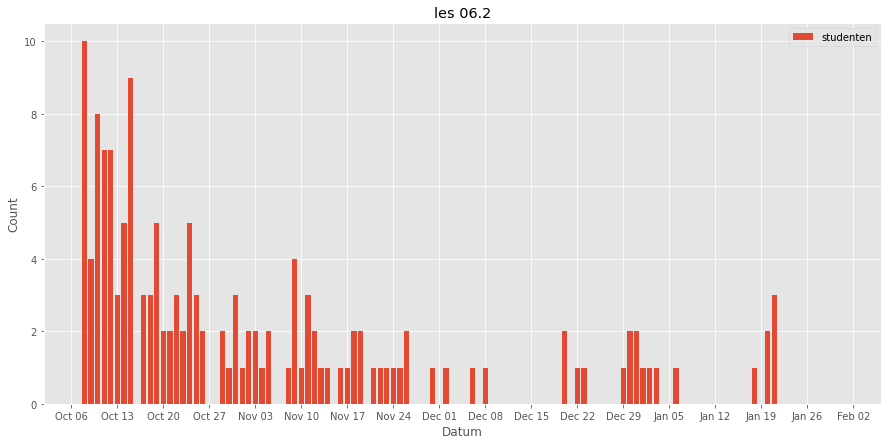

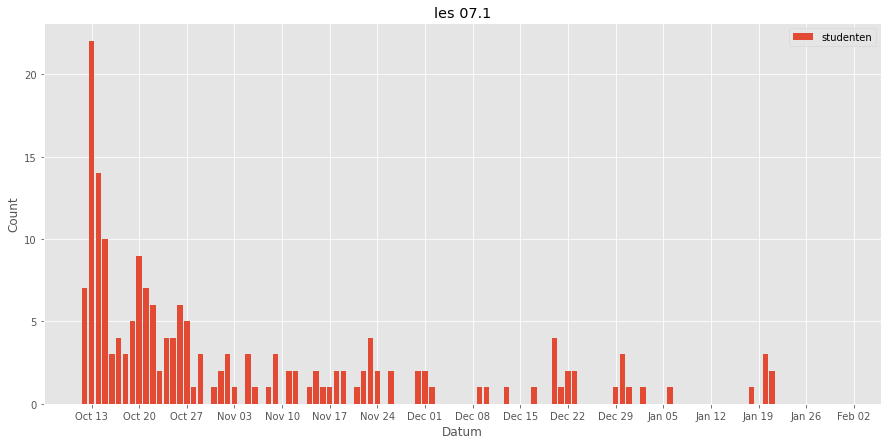

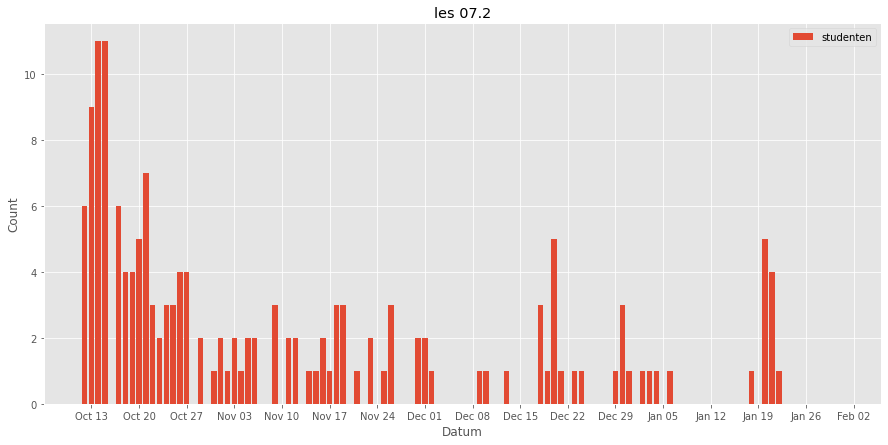

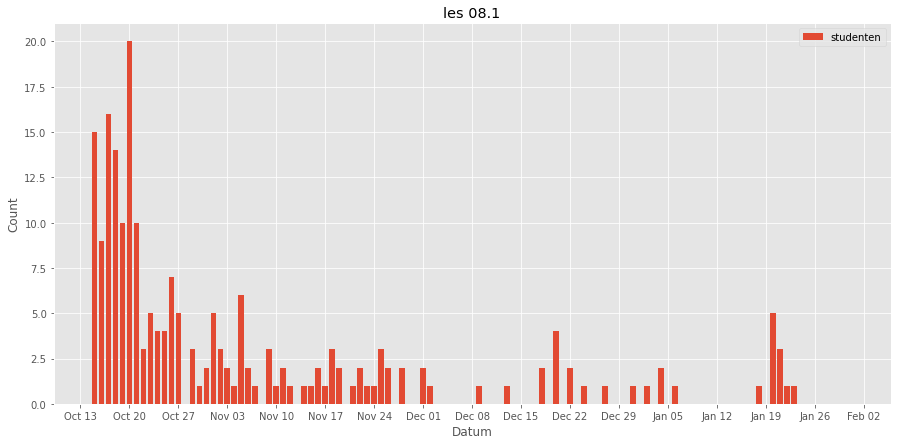

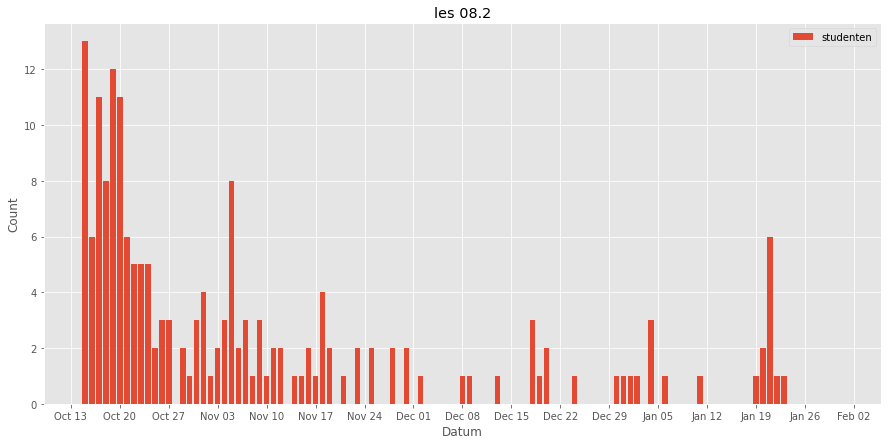

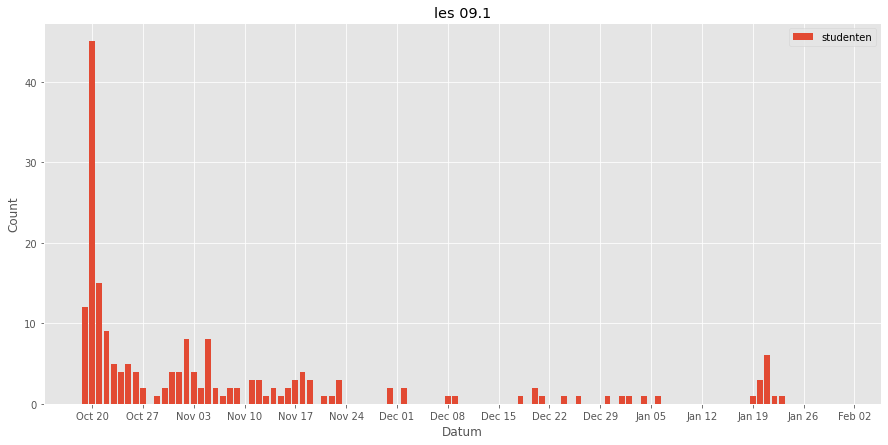

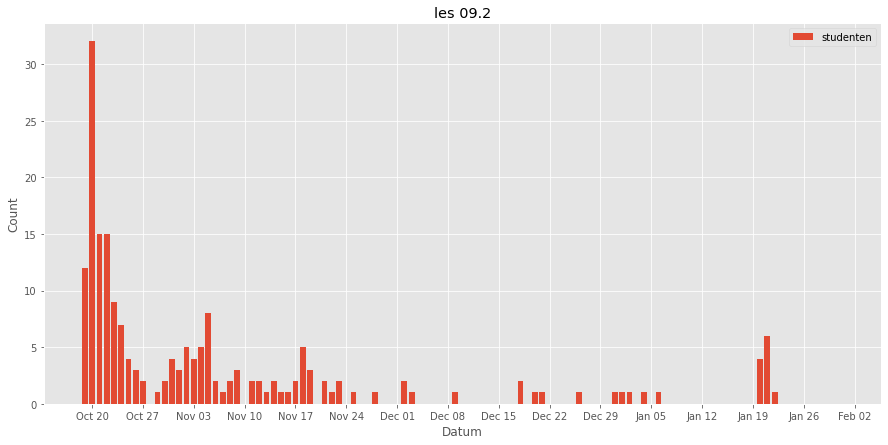

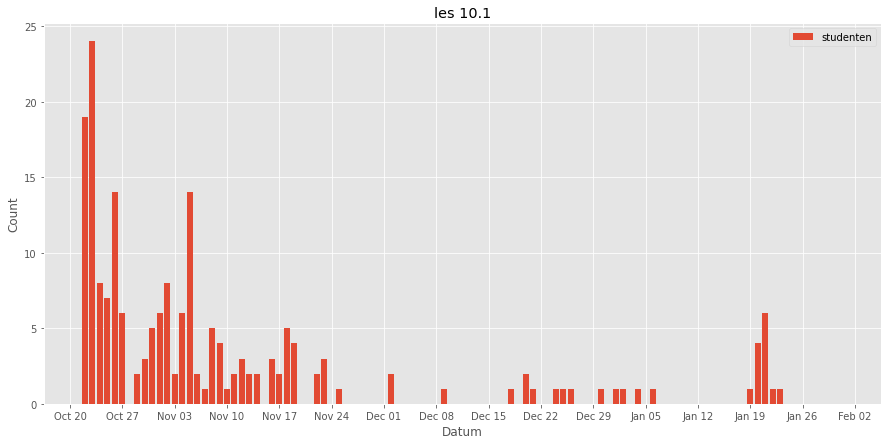

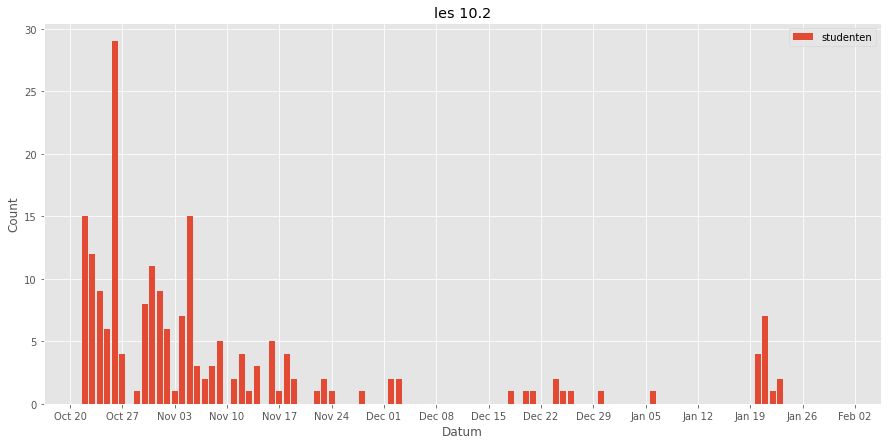

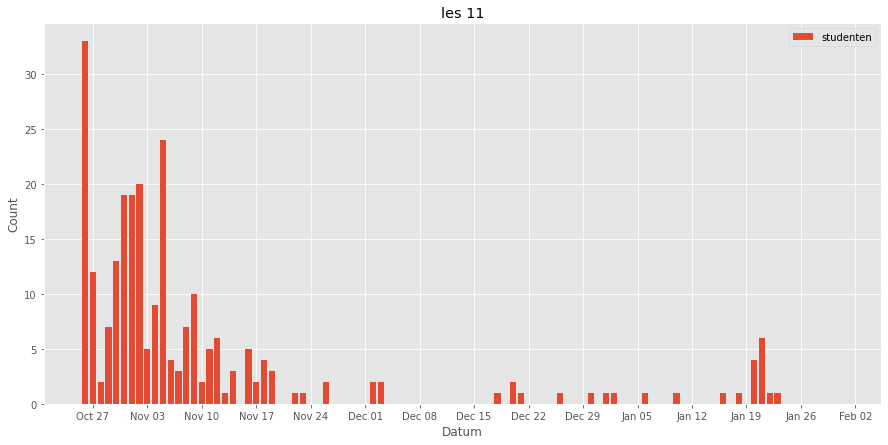

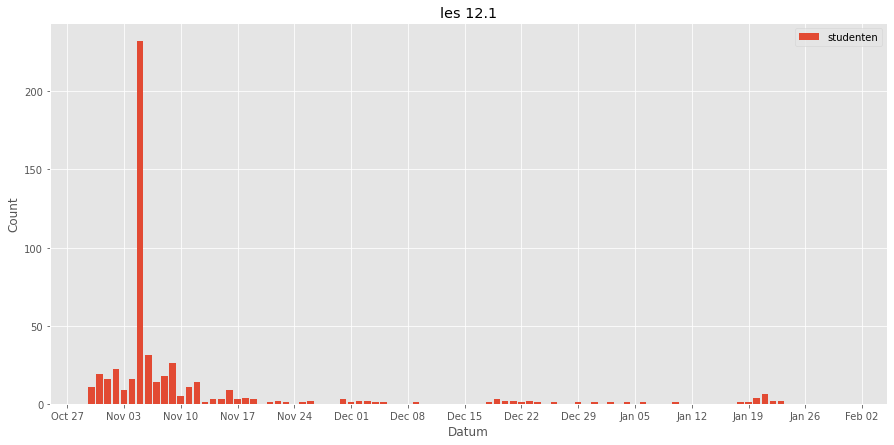

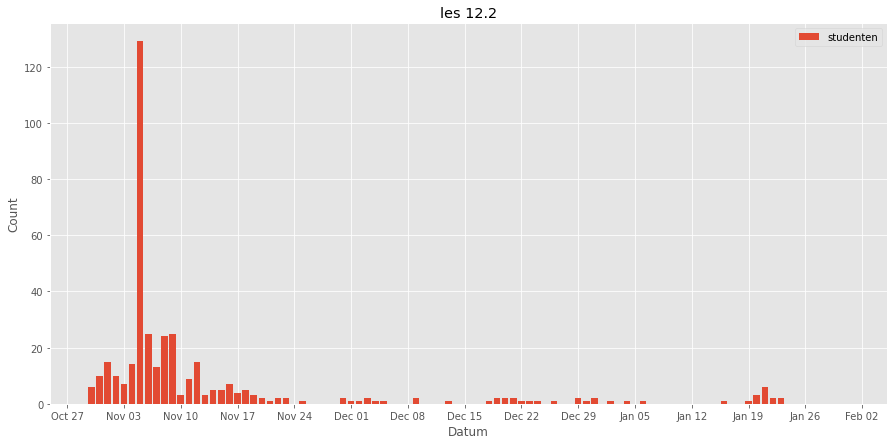

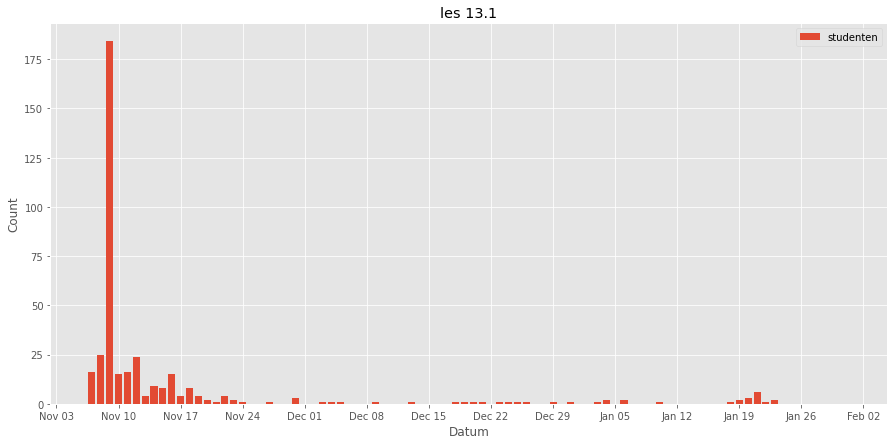

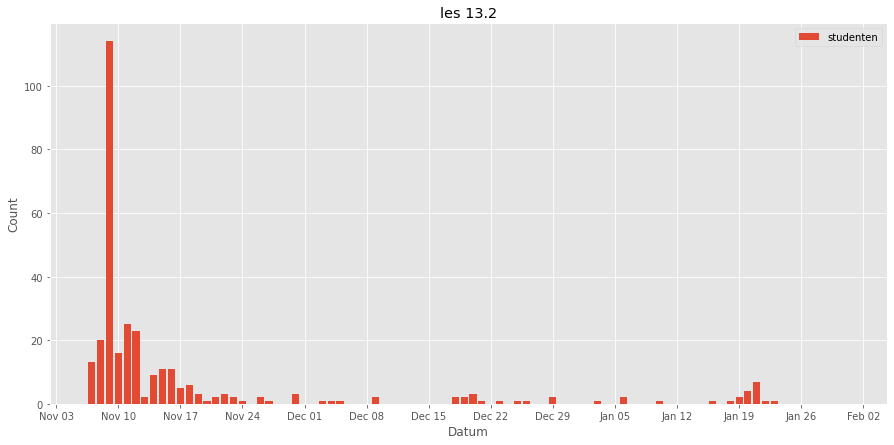

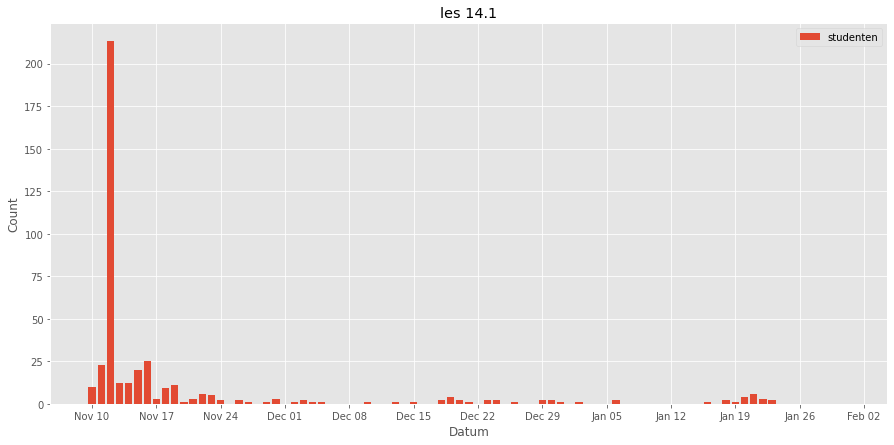

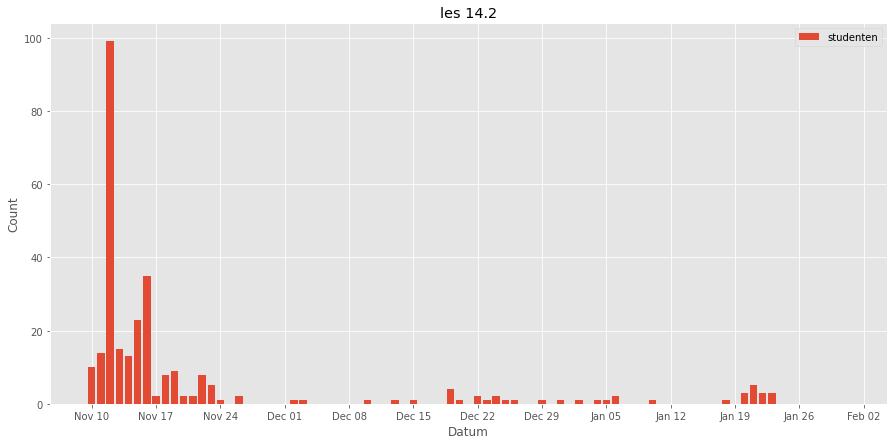

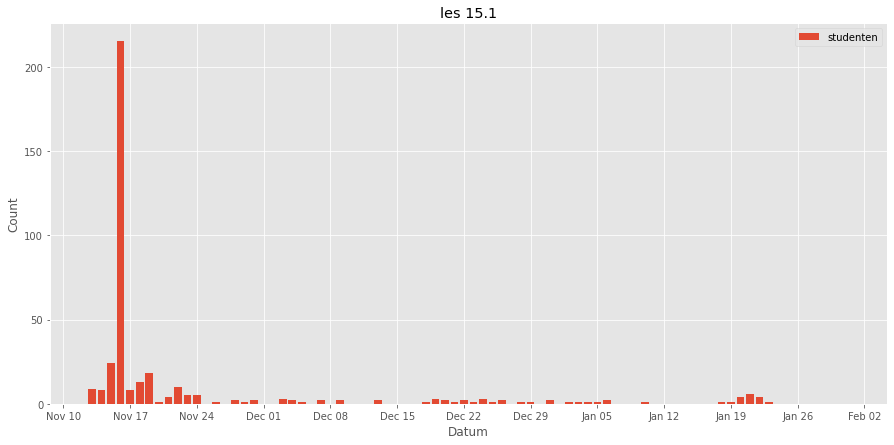

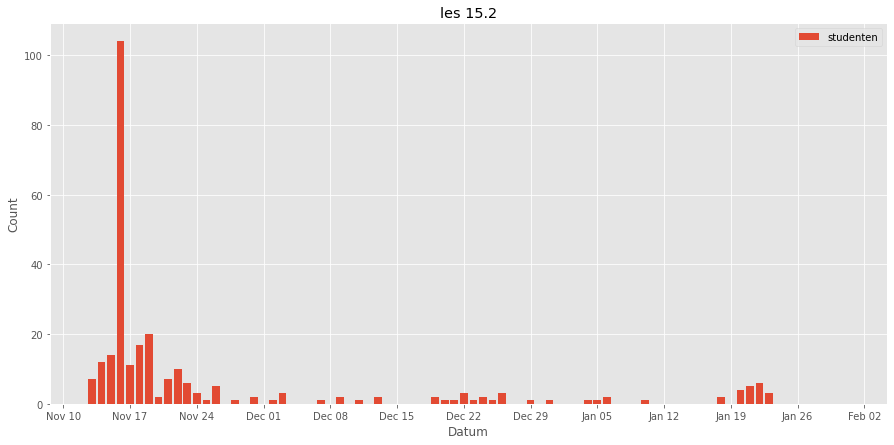

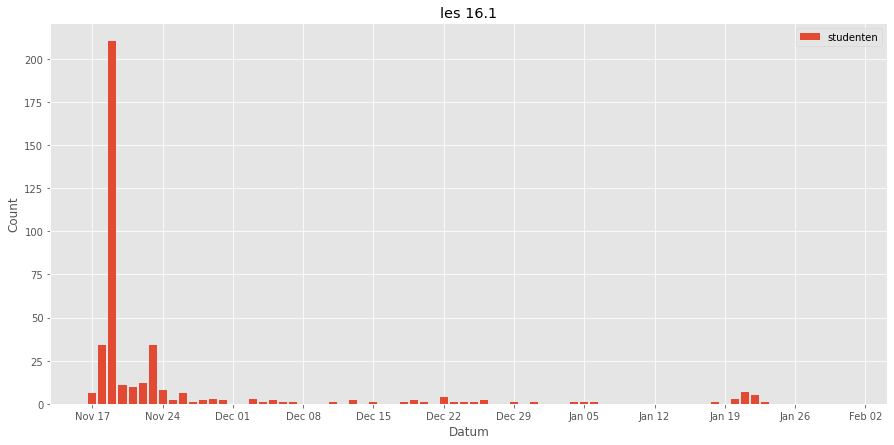

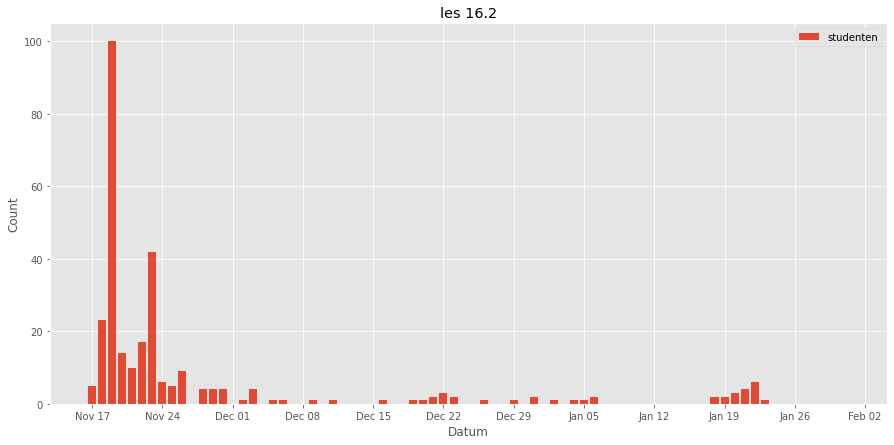

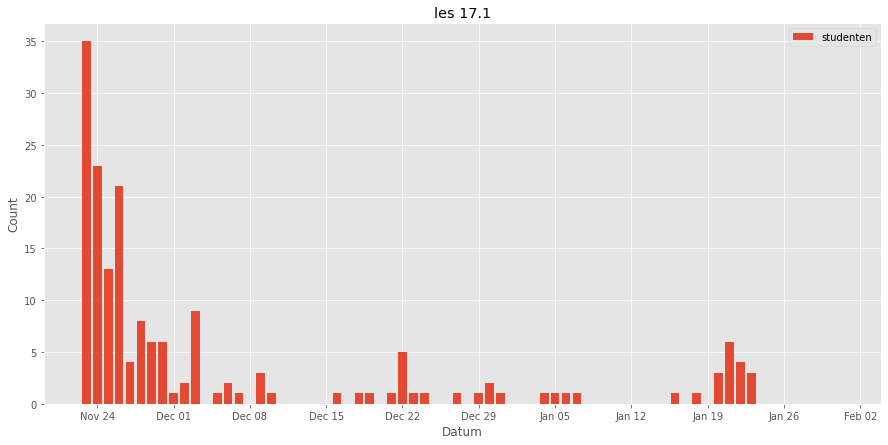

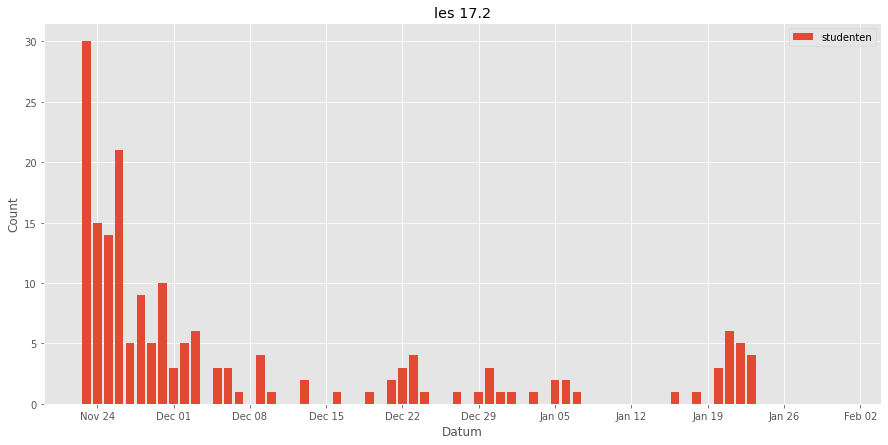

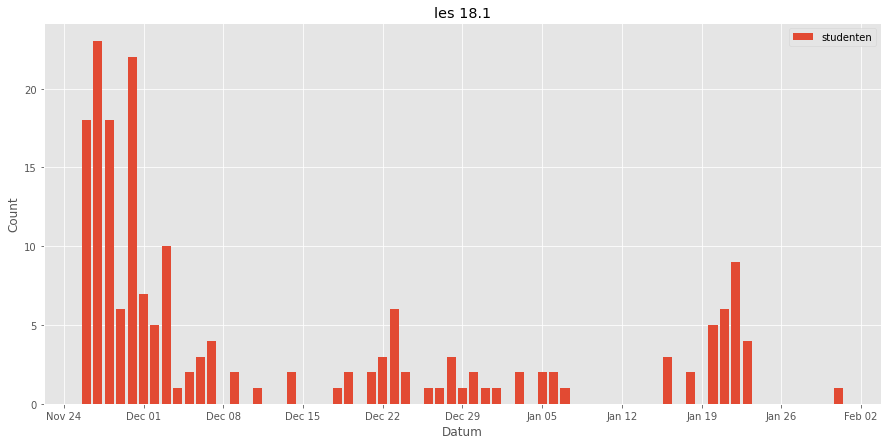

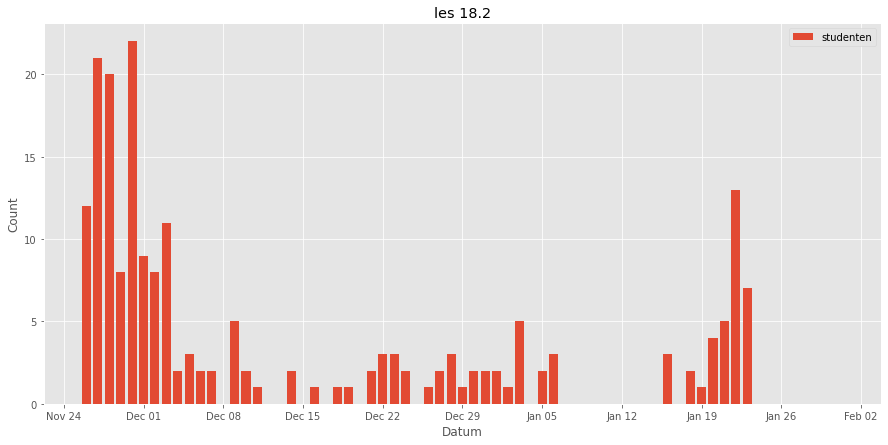

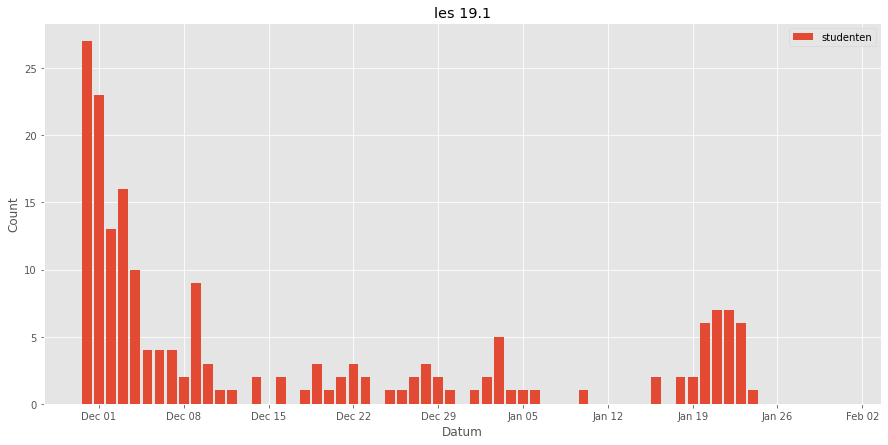

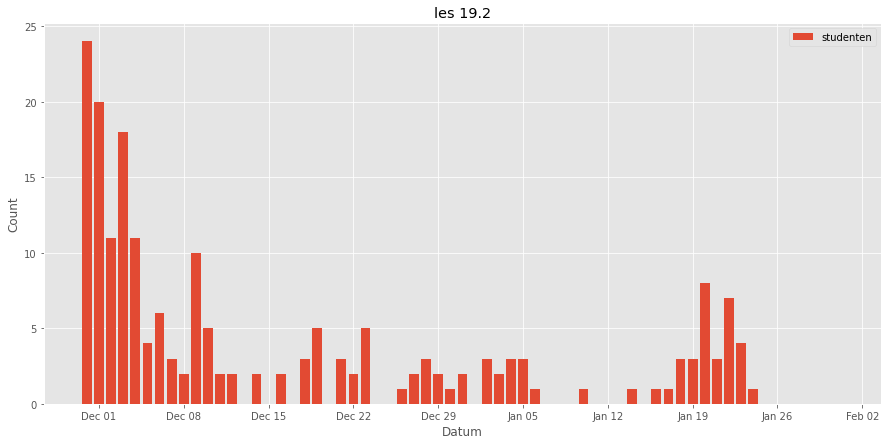

In [ ]:
plotAllAtLocation("Lesopnames/Groep B + 1 Bira A + B")

#Conclusies statistieken lesopnames groep B + Bira A + B
We kunnen dezelfde conclusies trekken als bij de lesopnames van groep A. De meeste activiteit gebeurd wanneer de les pas online komt. Het valt hier opnieuw op dat sommige lessen veel populairder zijn dan andere (100-200 studenten op piekmomenten i.p.v. <30) 

Verder zien we opnieuw dat sommige studenten op een later moment in het semester de lessen kijken en zien we opnieuw een kleine piek voor de examens en in de blokperiode.


#Statistieken opdrachten 1Bbi




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control 

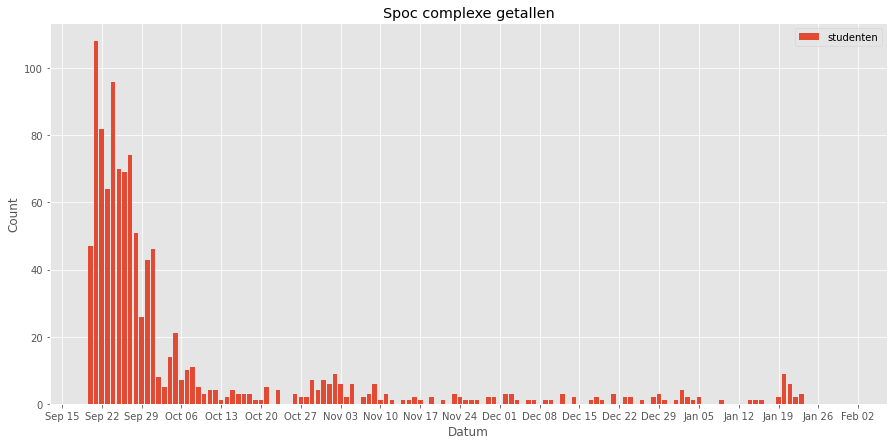

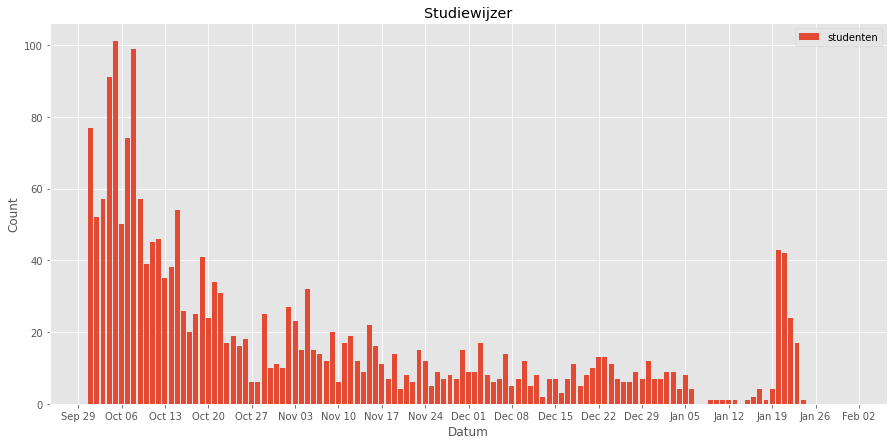

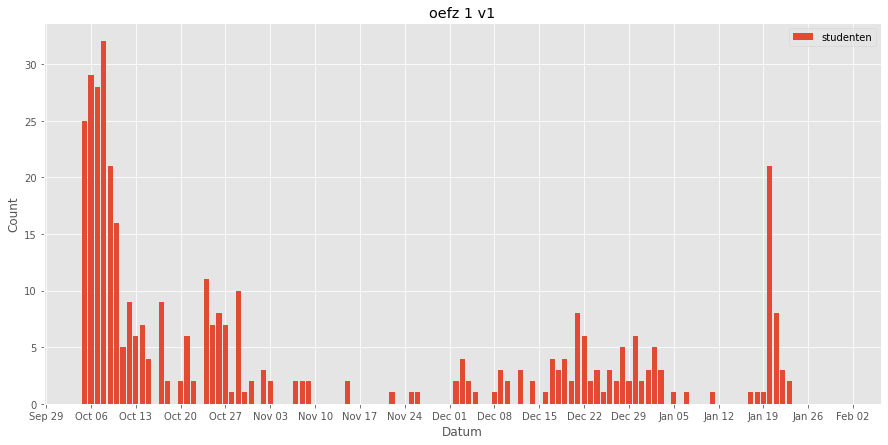

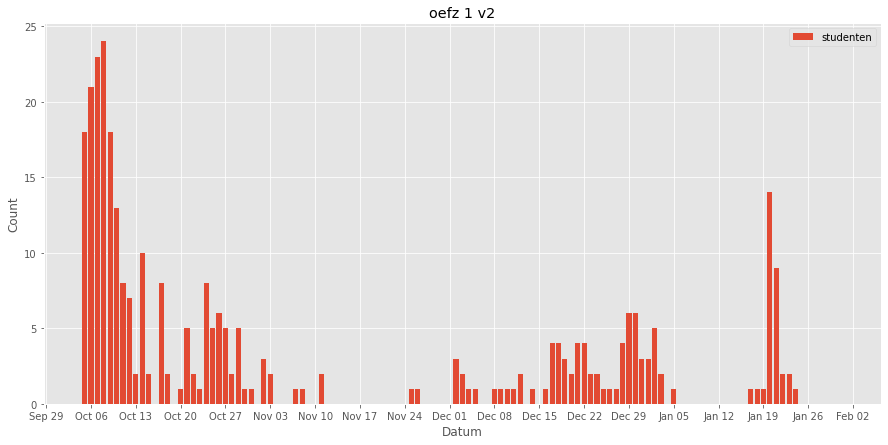

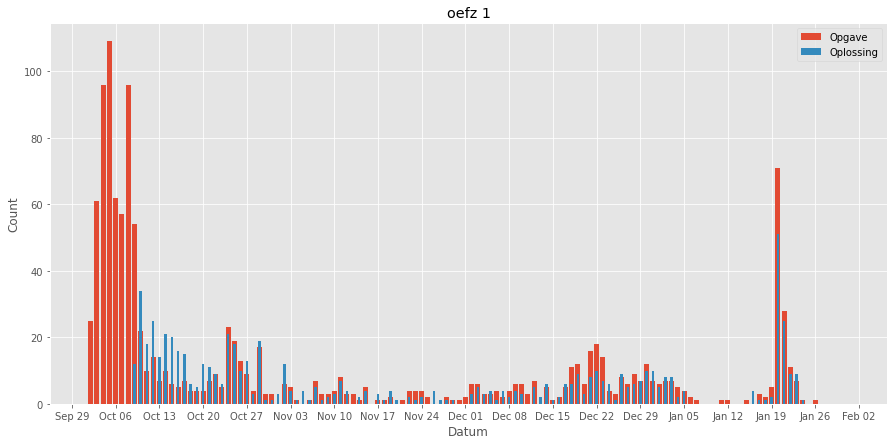

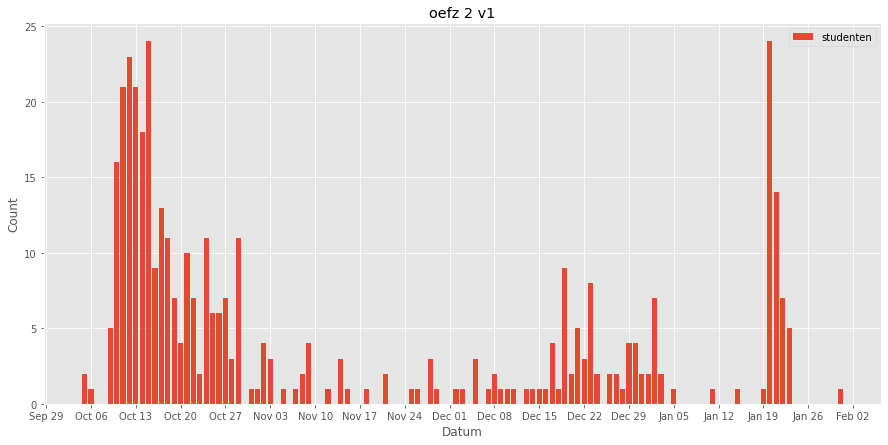

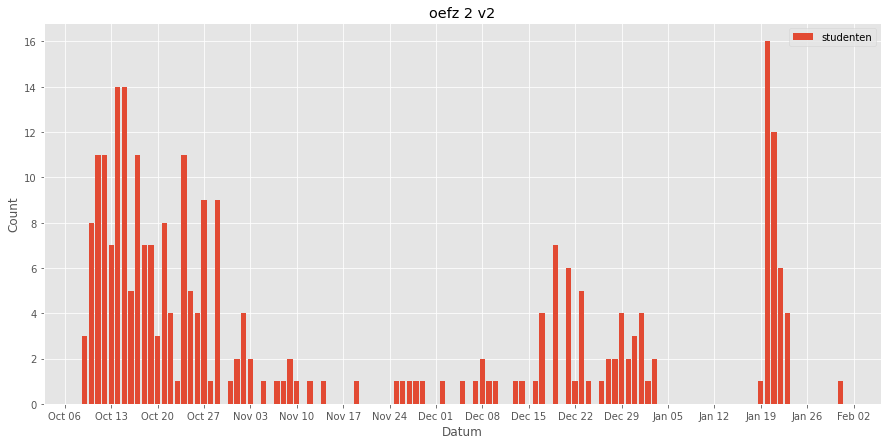

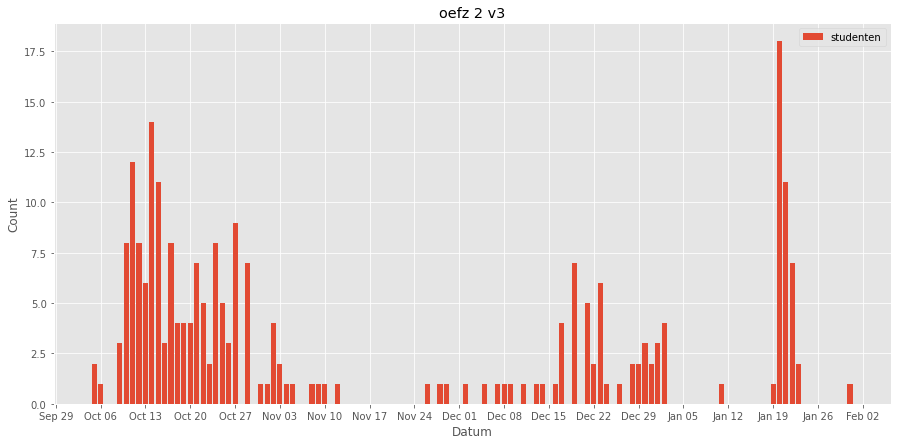

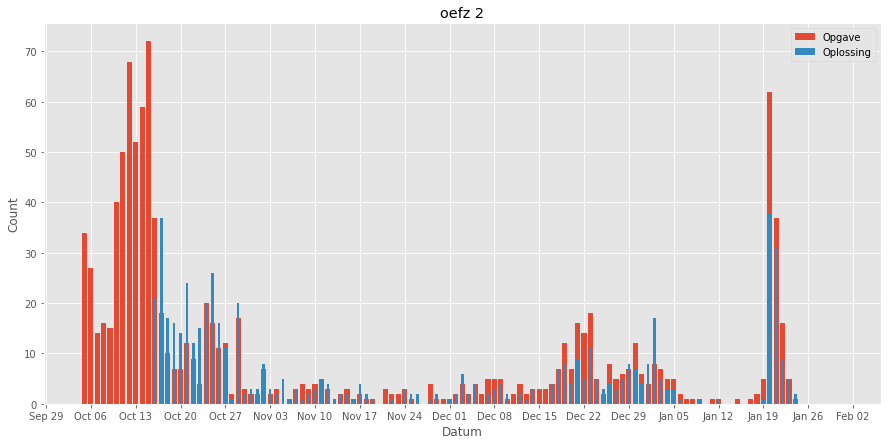

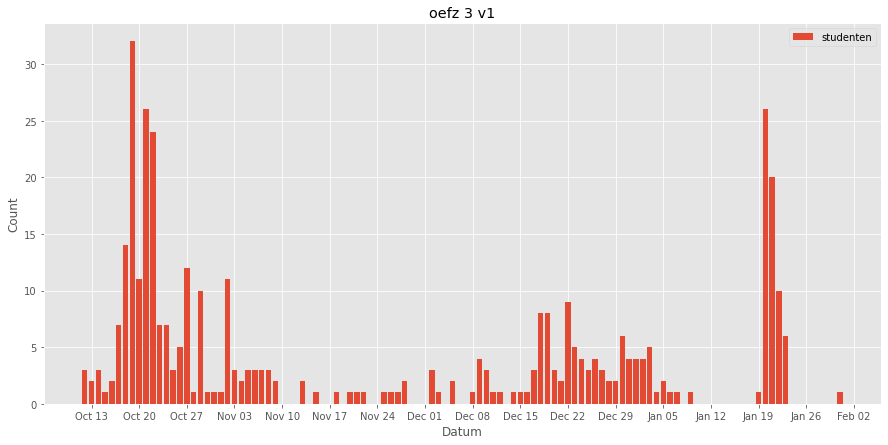

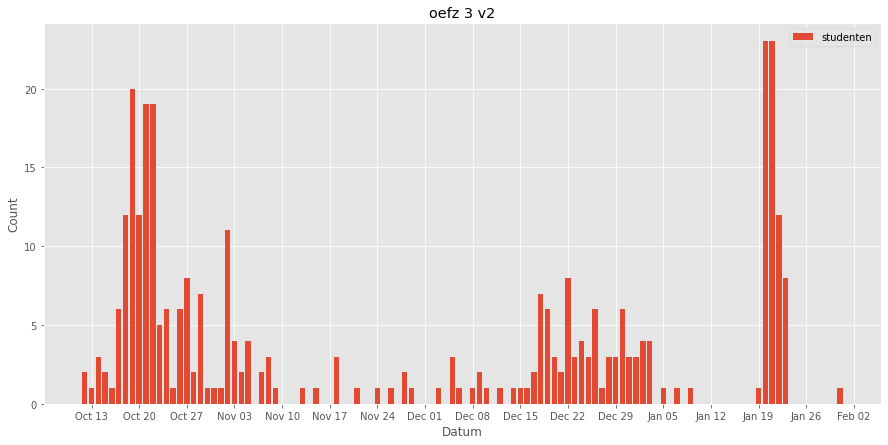

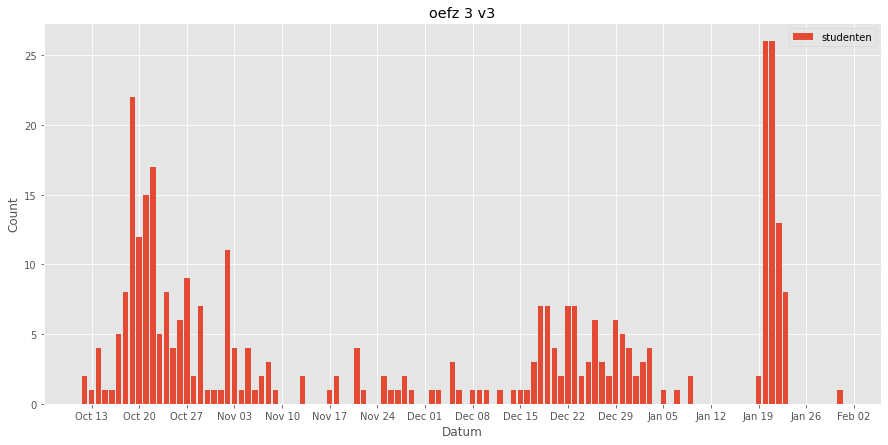

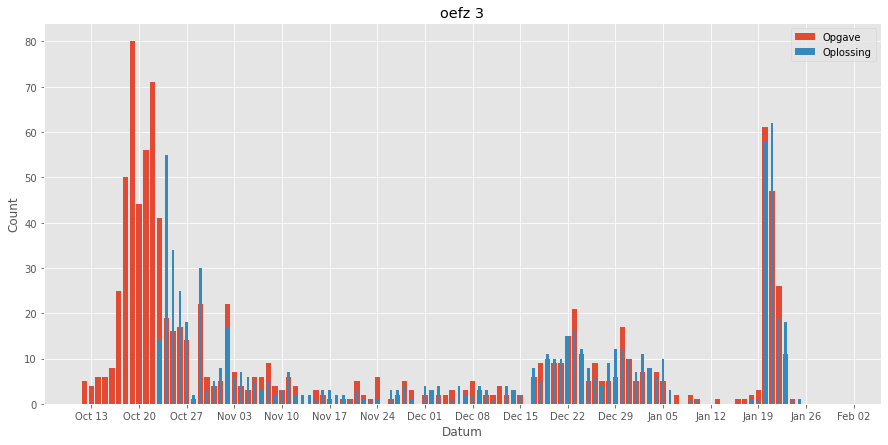

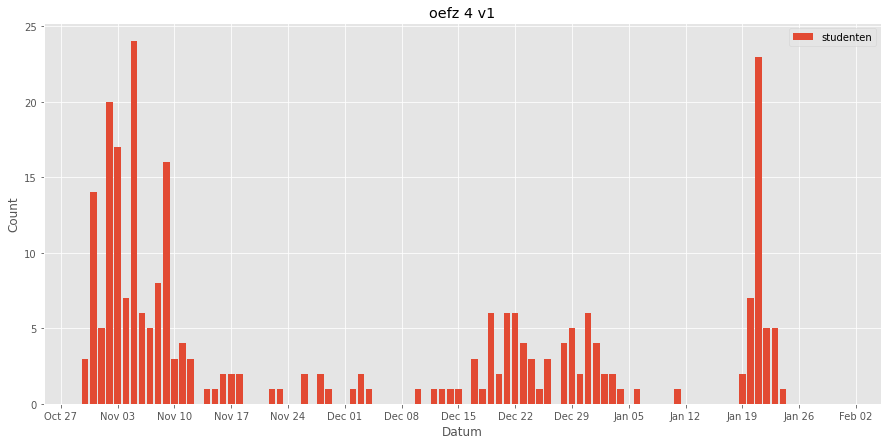

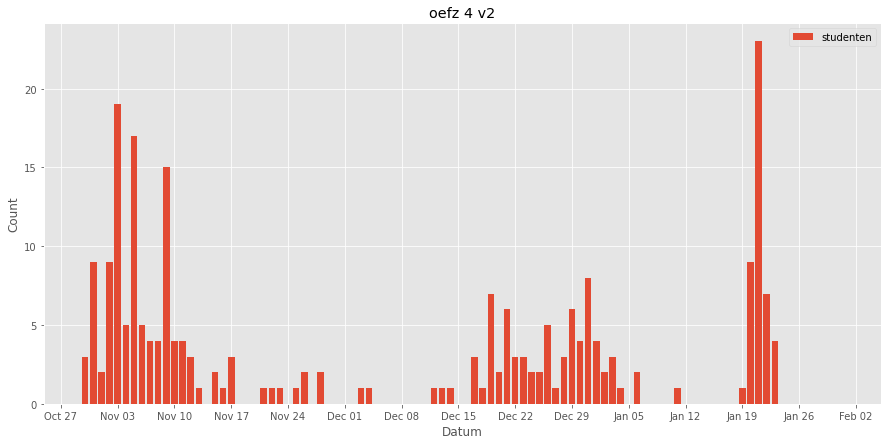

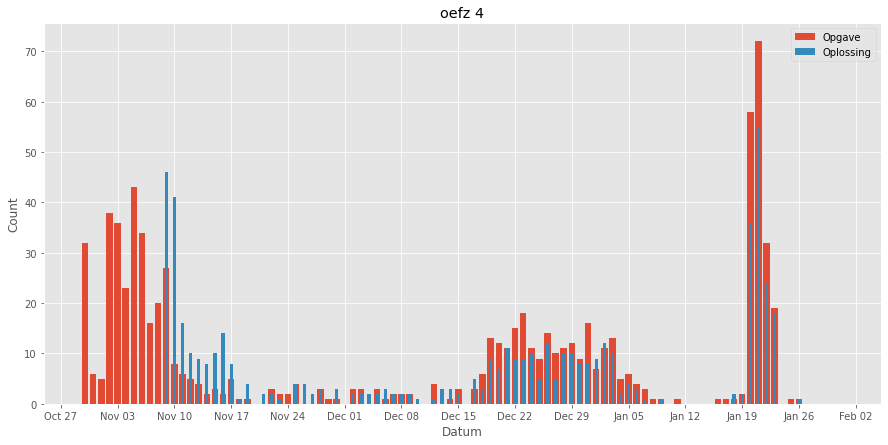

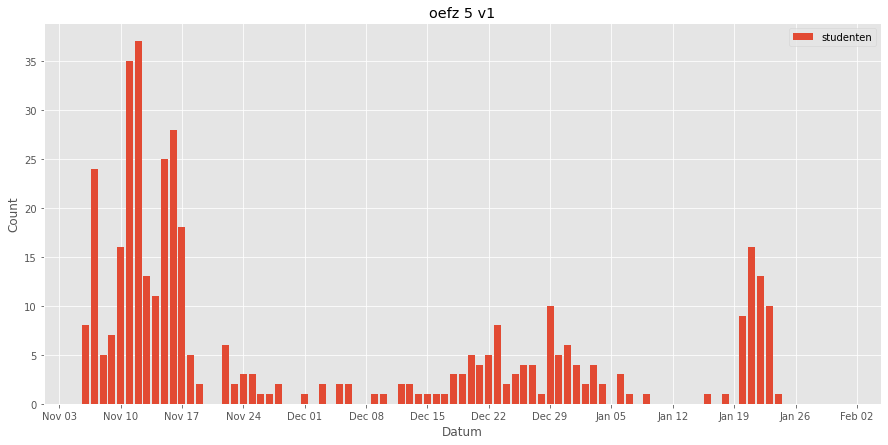

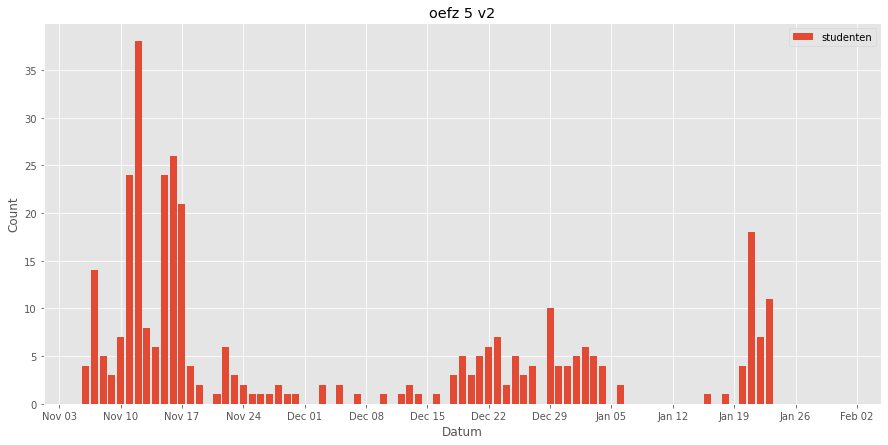

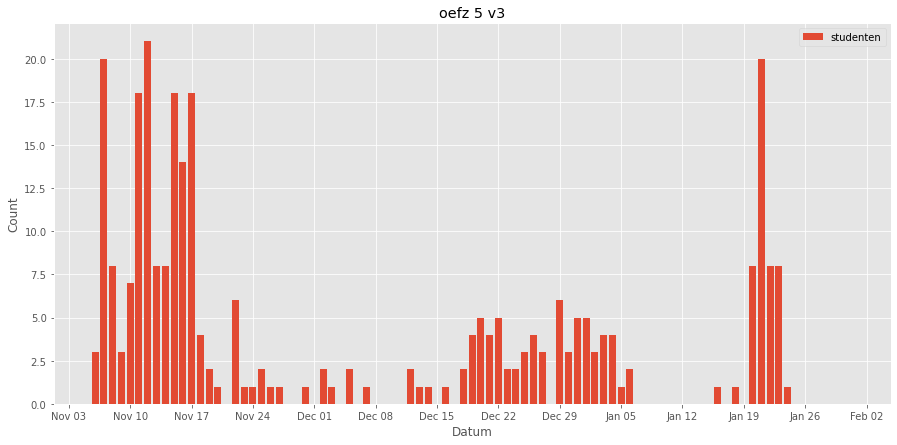

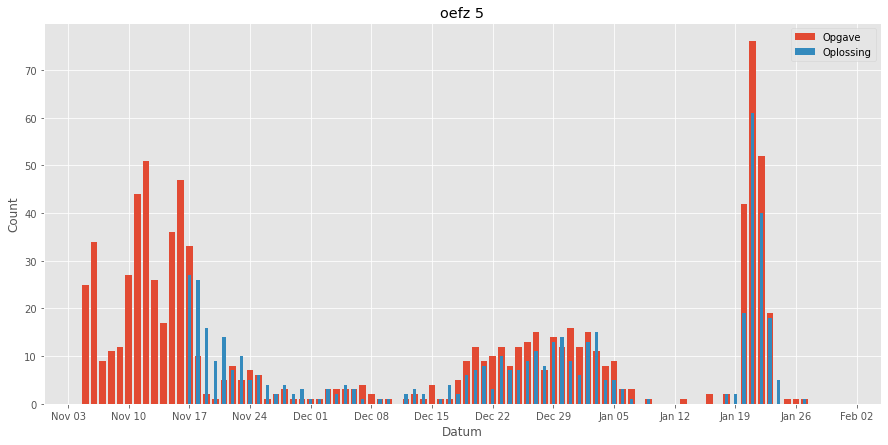

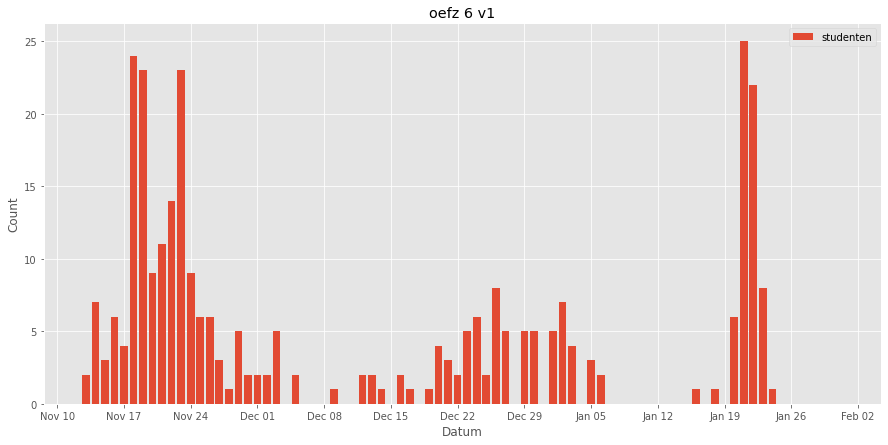

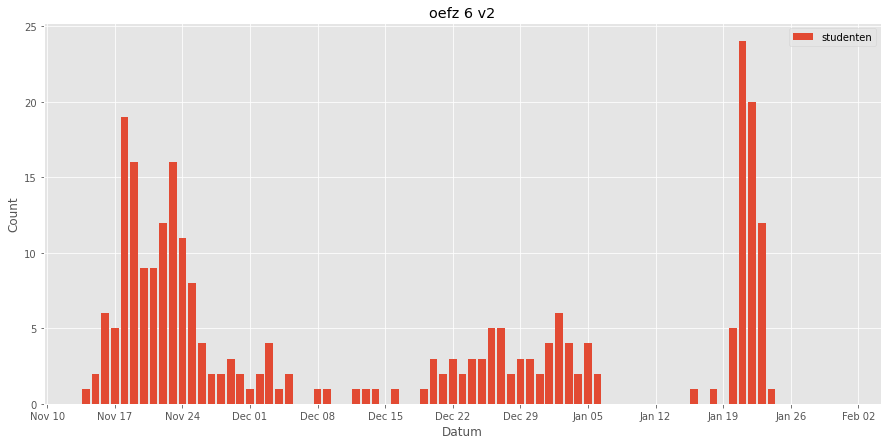

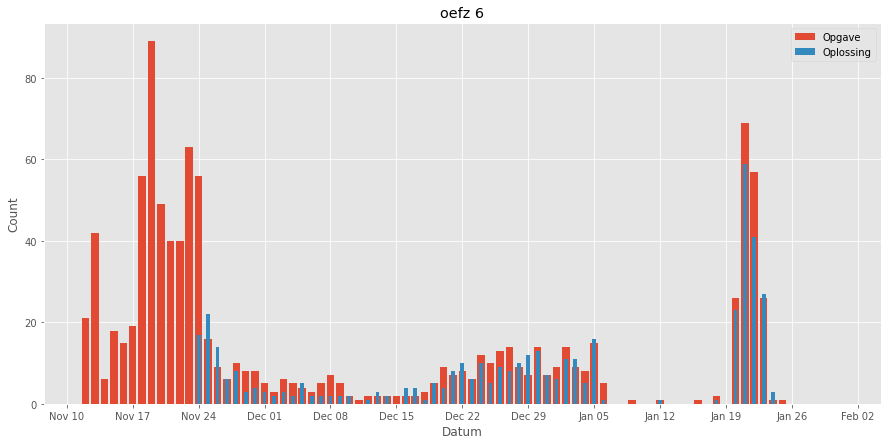

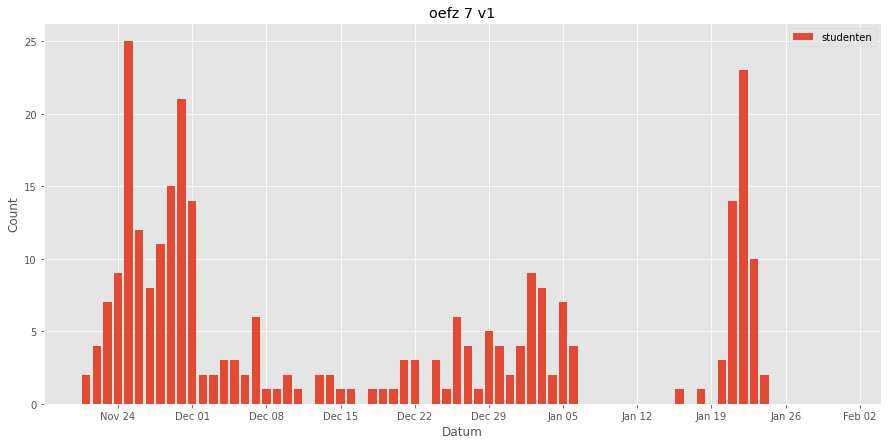

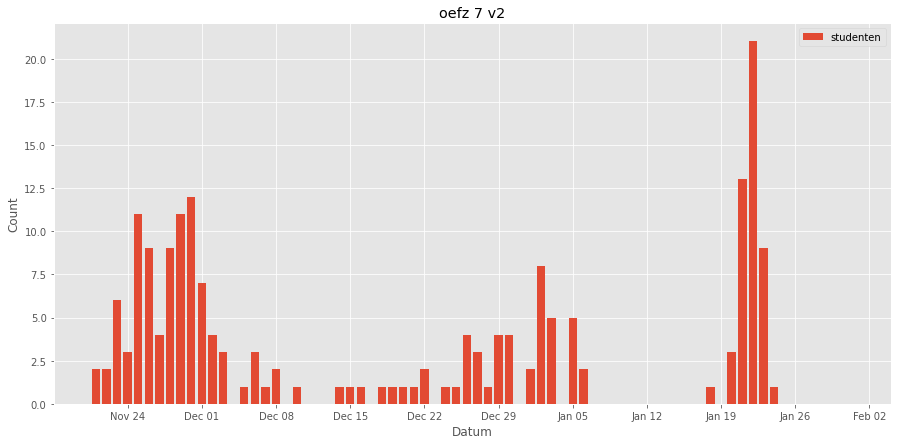

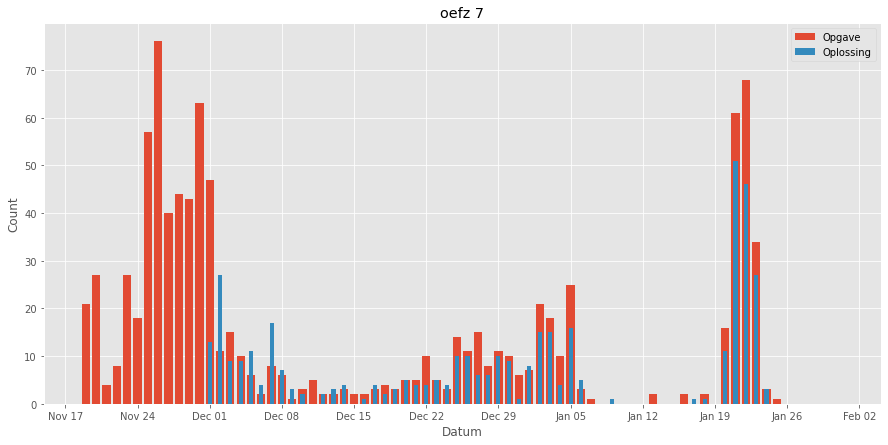

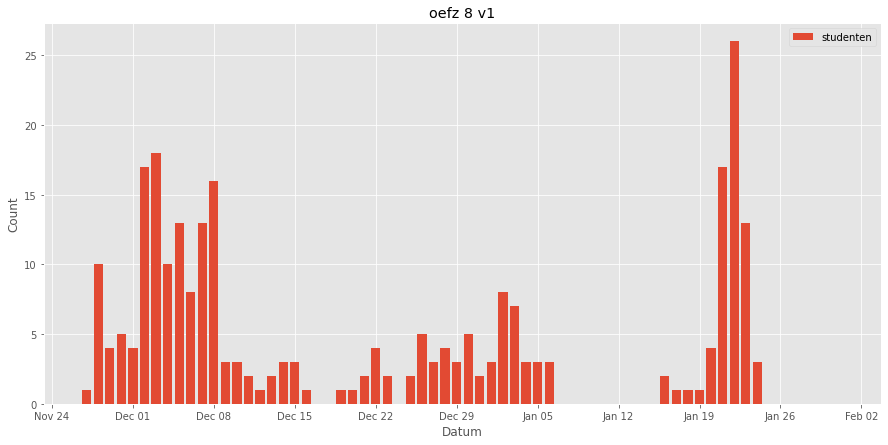

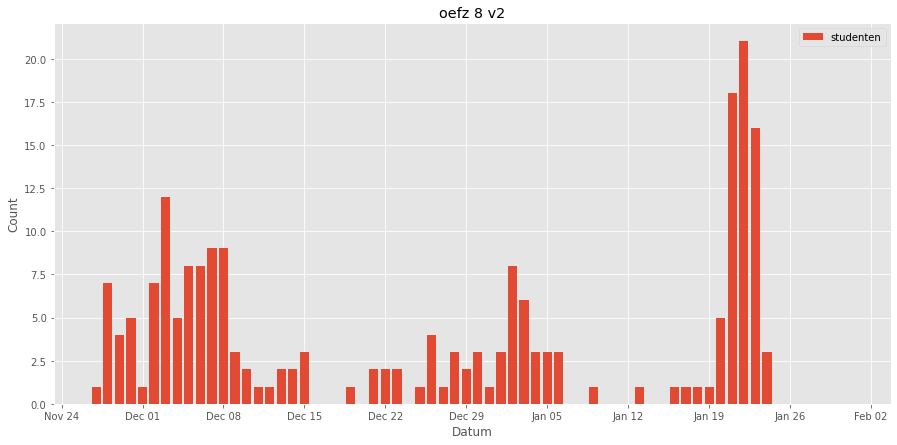

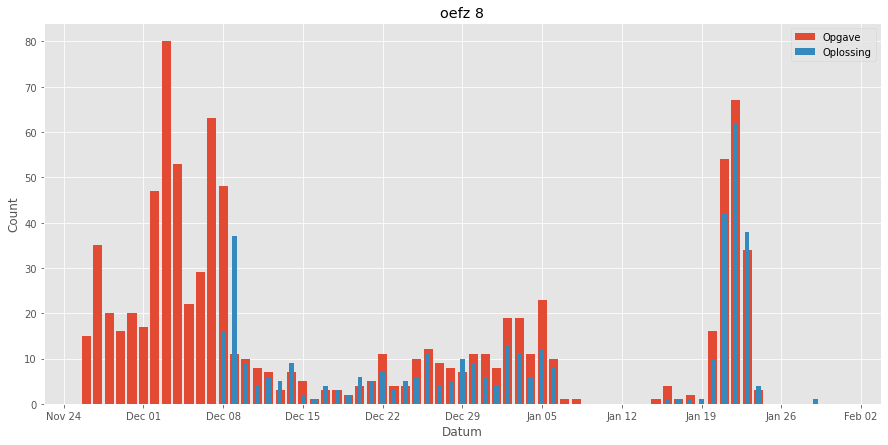

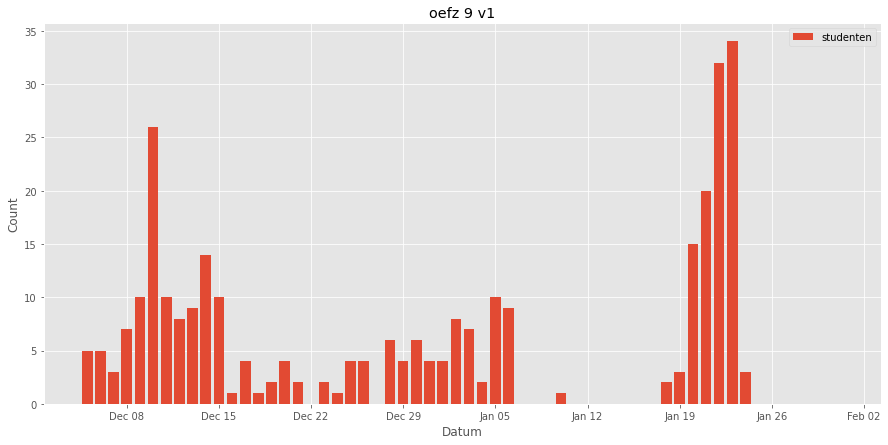

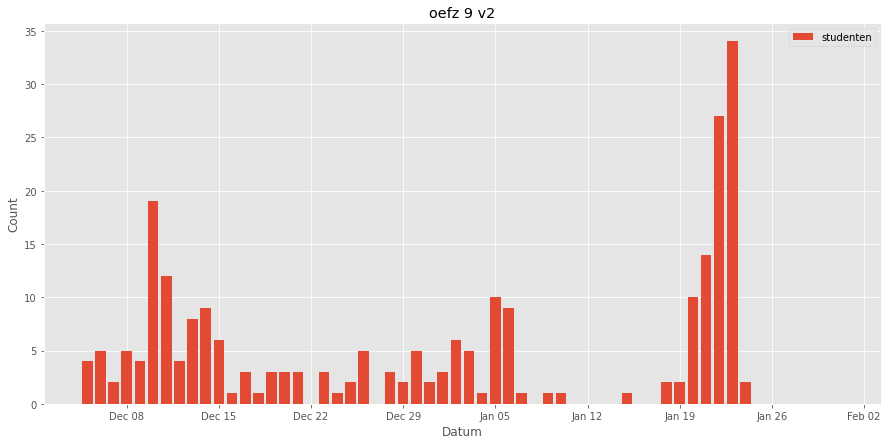

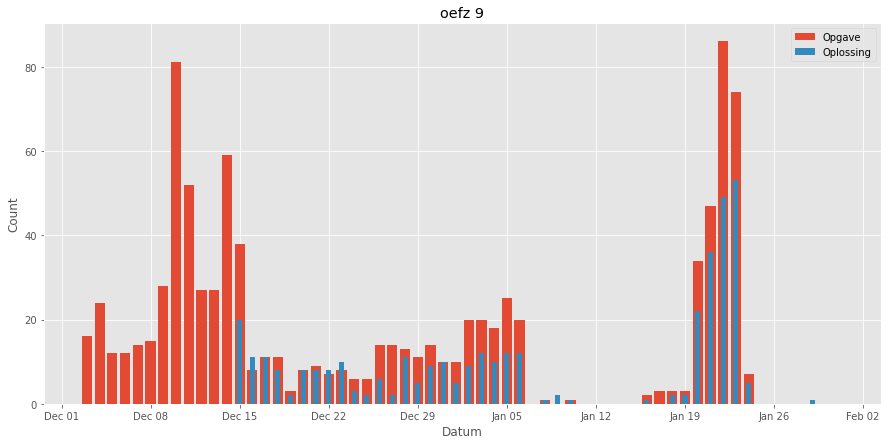

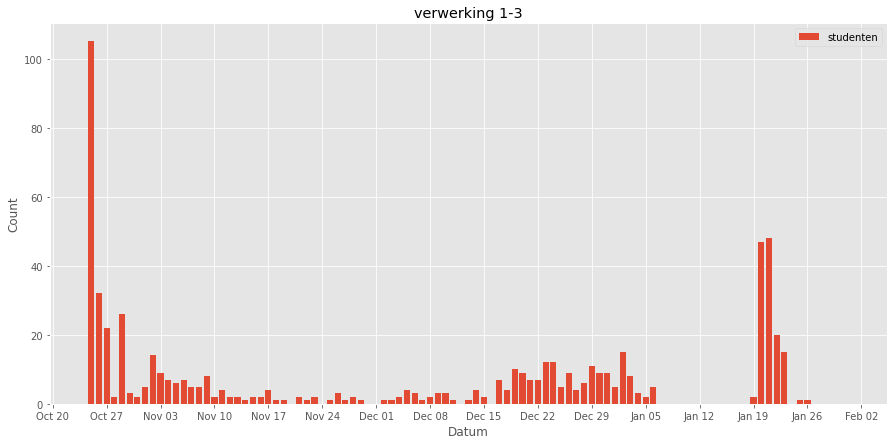

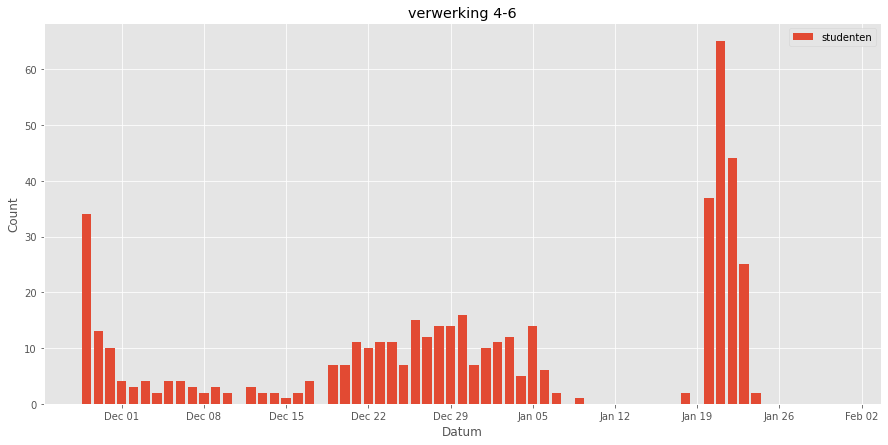

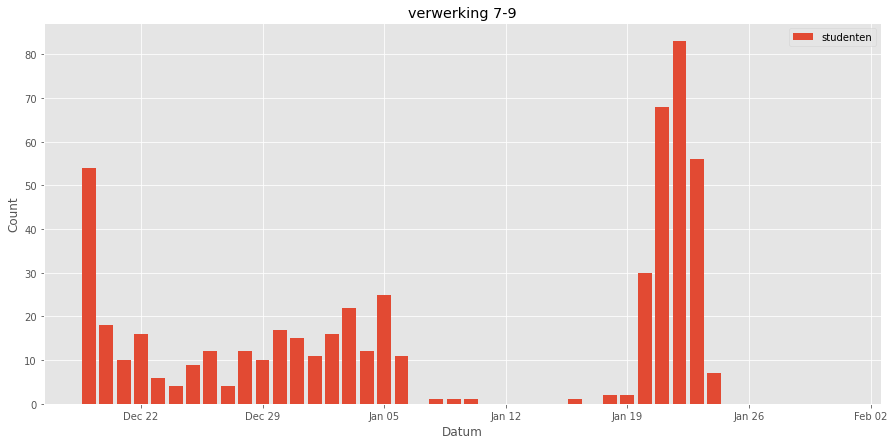

In [ ]:
plotAllAtLocationWithDoubles('Opdrachten 1Bbi', 10, 'opl ')

#Conclusies statistieken opdrachten 1Bbi
In deze sectie worden alle items in de map opdrachten 1Bbi weergegeven.

Allereerst worden het gebruik van de Spoc complexe getealle en studiewijzer bekeken. Hierbij valt het op dat de complexe getallen in het begin van het jaar bekeken worden de veel van de studenten, vervolgens blijkt hier echter weinig interesse in. De studiewijzer is net iets populaider en zit naast een piek in het begin van het sememste ook een lichte stijging in de dagen voor het examen. 

Vervolgens worden de oefenzittingen bekeken, hierin worden de gegevens van de "leidraad" en "modeloplossing" altijd samen geplot met als naam oefz (nummer), de v1, etc bij de naam van de plots verwijst naar het nummer van de video in de respectievelijke map van die oefenzitting. 

Er kan worden vastgesteld dat de video's slechts door een derde van de studenten die de oefenzitting bekijken, bekeken worden tijdens het doornemen van de leerstof. De video's zijn vooral populair tijdens de week van de oefenzitting, de blok en de dagen voor het examen.

We zien dat er meestal een 80 tal studenten de leidraad bij de oefenzitting bekijken op de piekdagen, deze zijn meestal in de week van de oefenzitting. Enkel bij oefenzitting 4 en 5 zien we de grotere pieken pas in de examenperiode. Voor de andere oefenzittingen is er zowel in de week van de oefenzitting als in de examenperiode een bijna gelijke interesse. 

Verder zien we dat slechts een deel van de studenten interesse toont in de modeloplossingen. In de dagen dat deze pas online zijn liggen deze pieken rond de 20-50 studenten. Het valt op dat de modeloplossingen pas echt veel geraadpleegd worden de dagen voor de examens (50+ gebruikers). Hiernaast valt het op dat het openen van de leidraad niet verzekerd dat ook de modeloplossing geraadpleegd wordt meestal zijn er 10-20 meer studenten die de leidraad raadplegen, maar geen oplossing. 

Hiernaast blijkt dat de verwerking van de oefenzittingen een grote populariteit kent in de dagen voor de examens.

#Statistieken opdrachten 1Bira
Dit wordt op gedeeld in 2 delen, eerst worden de schema's van Hilde bekeken, vervolgens de oefenzittingen zelf.


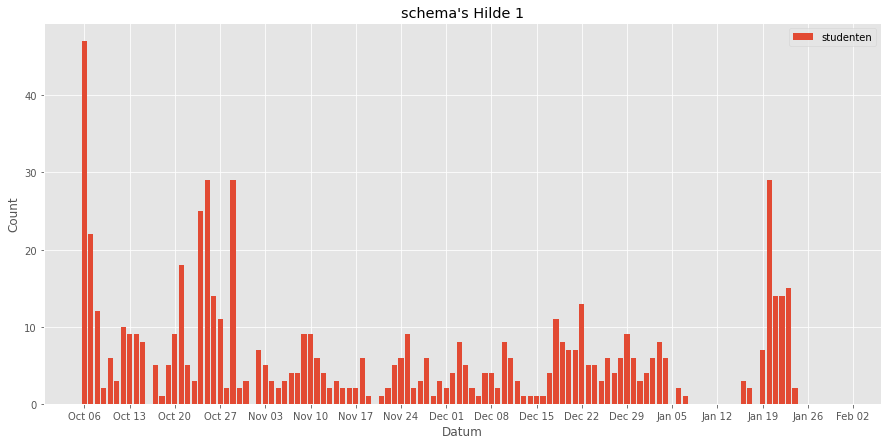

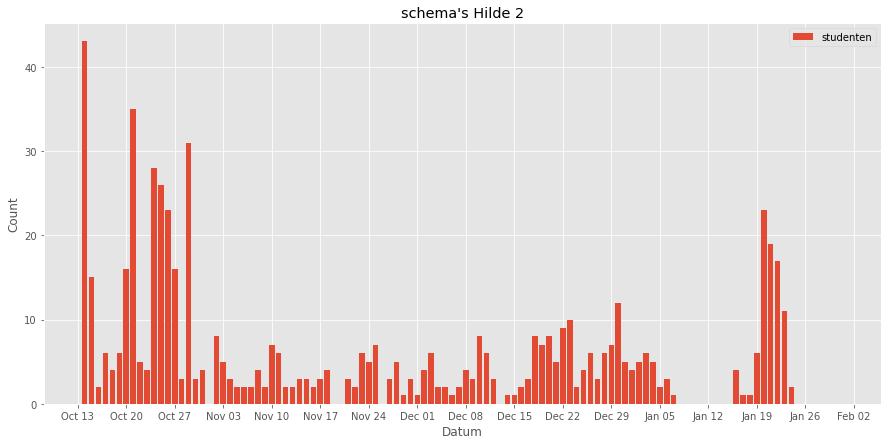

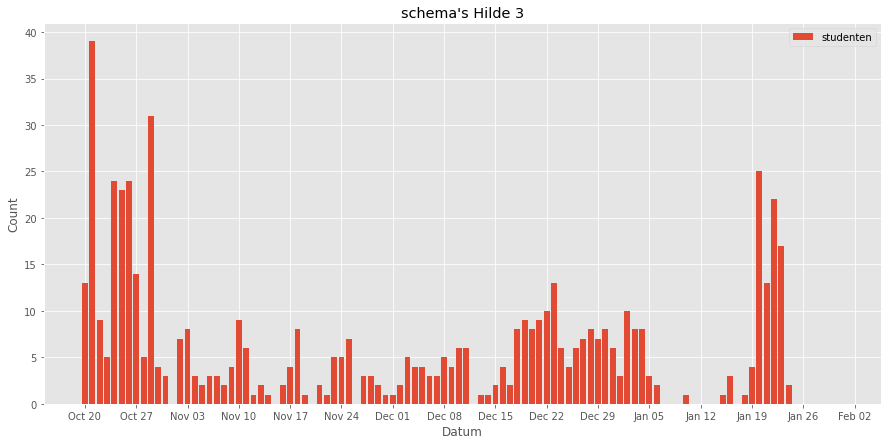

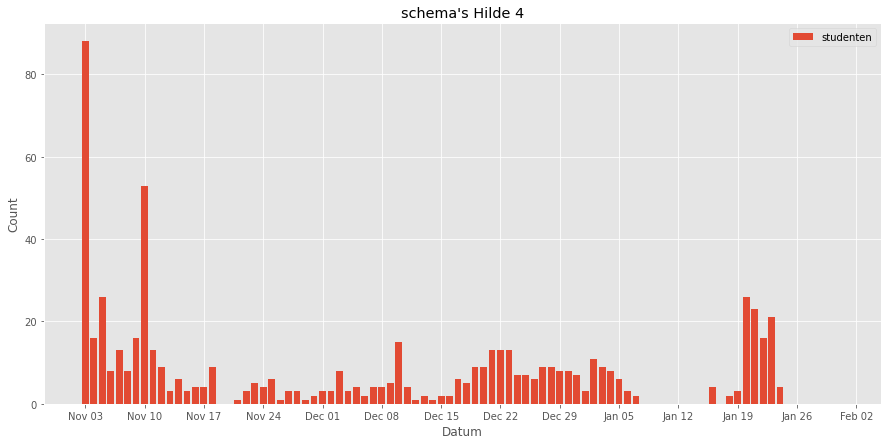

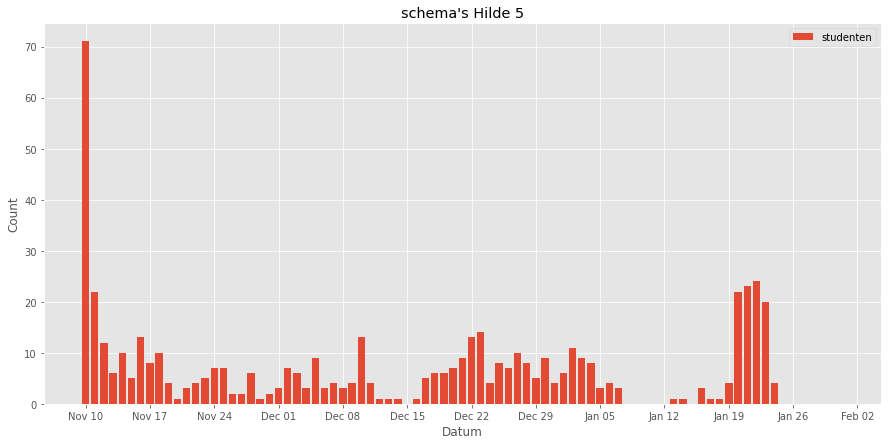

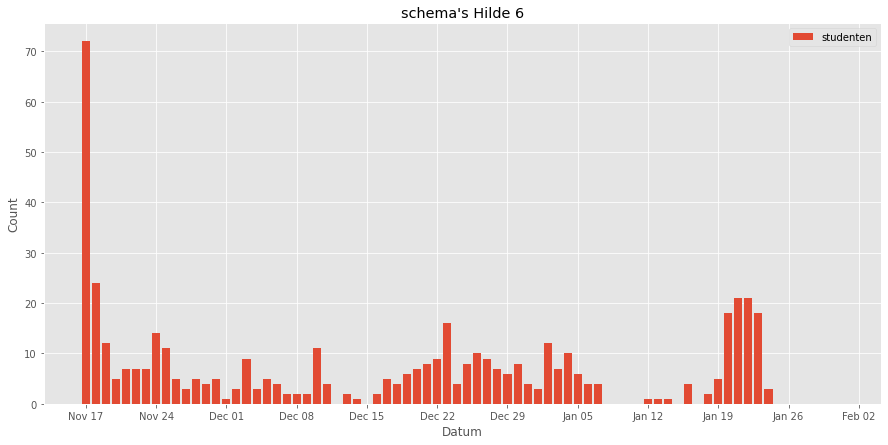

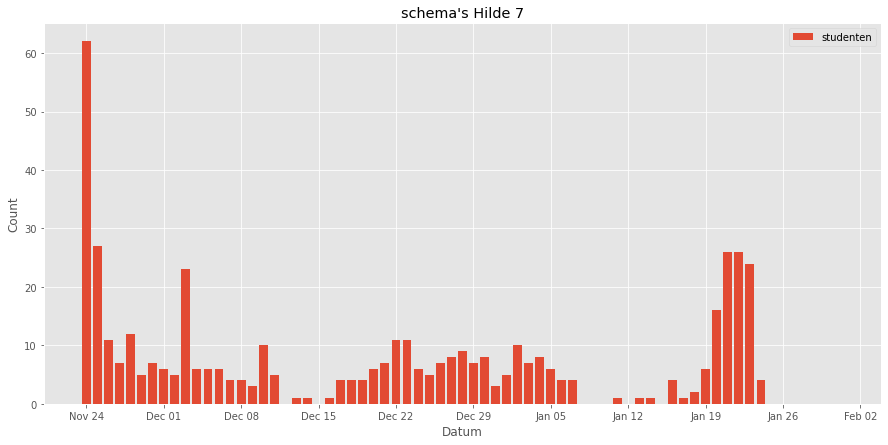

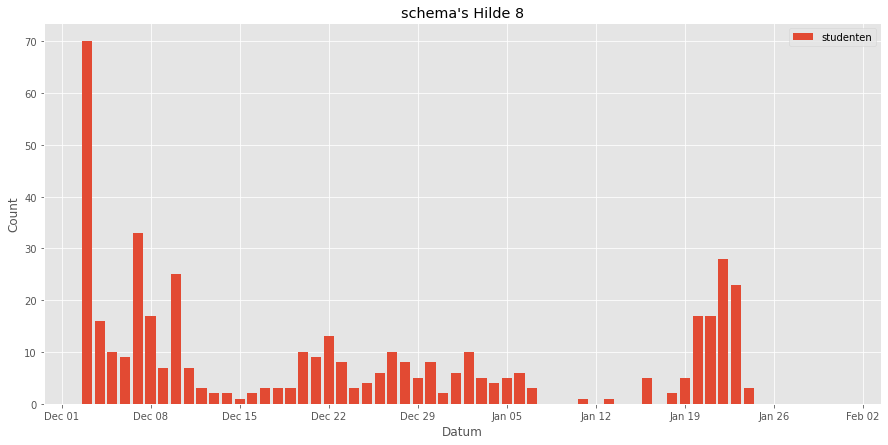

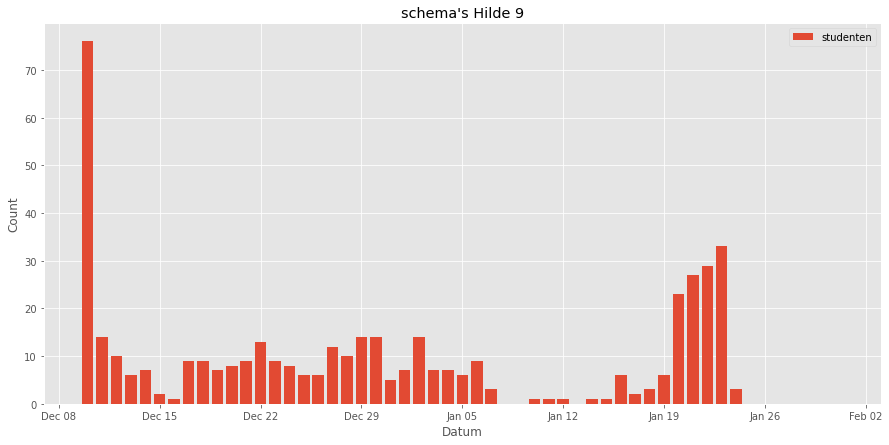

In [ ]:
plotAllAtLocation("schema's Hilde")

#Conclusies schema's Hilde
Allereerst valt het op dat de schema's pas echt ondekt worden na de 3de oefenzitting waarna het aantal views op de piekdag bijna dubbelt (van 40 naar 80) verder blijken deze schema's wel geliefd bij de studenten voor de oefenzittingen en worden deze de dagen voor de examens opnieuw geraadpleegd.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPara

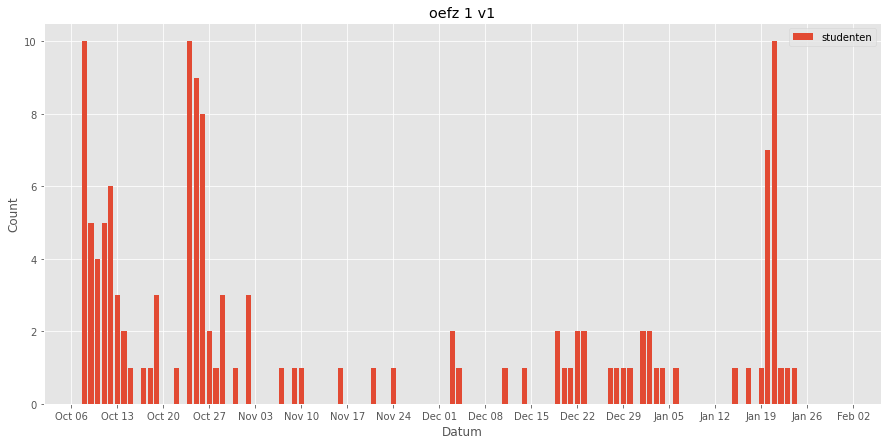

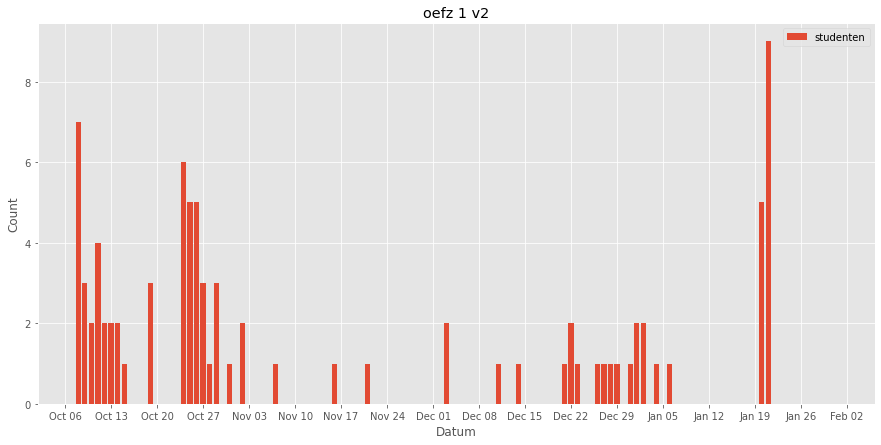

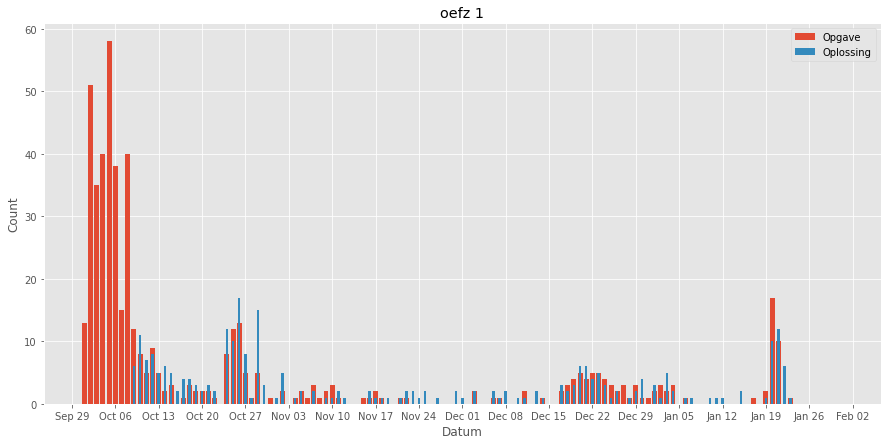

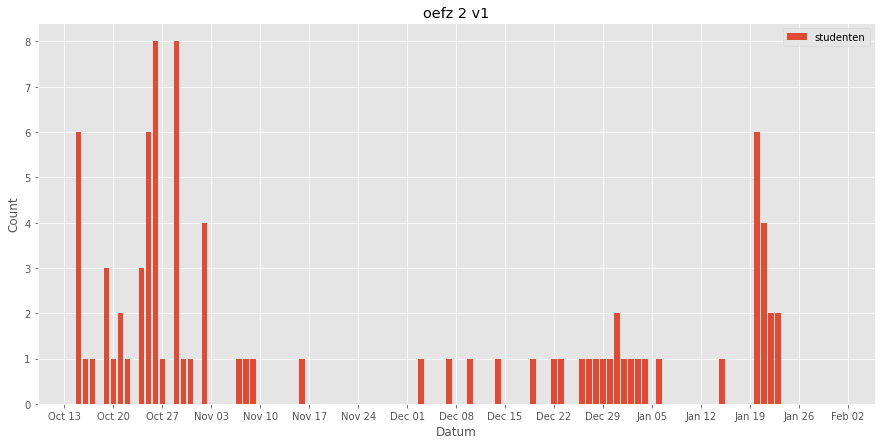

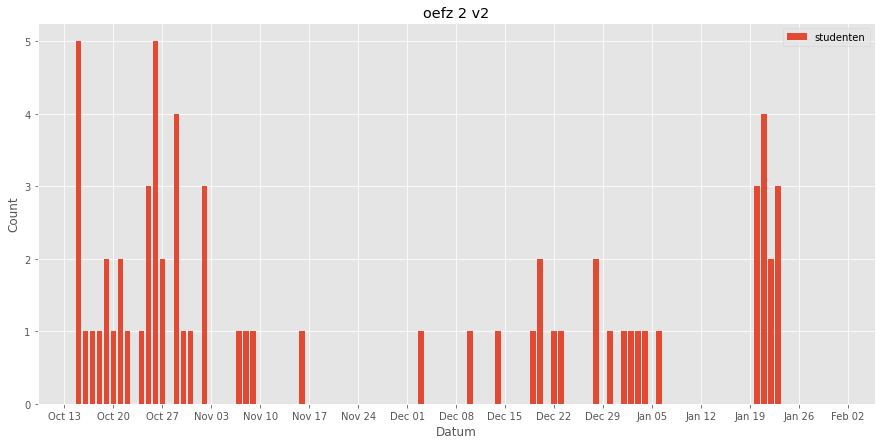

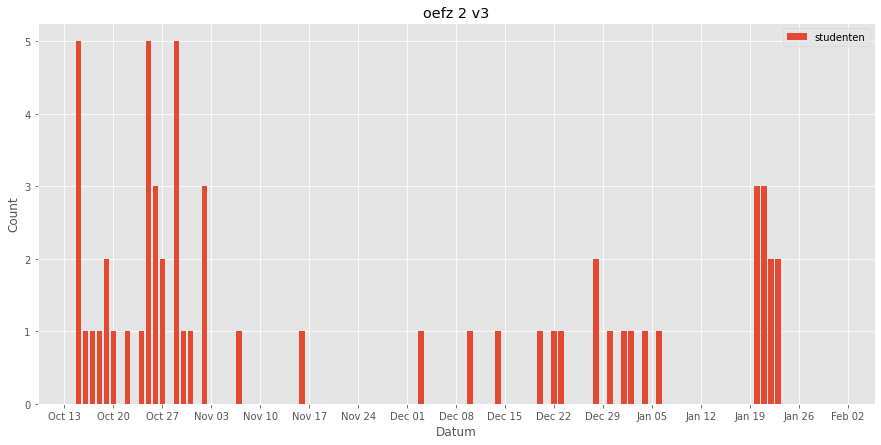

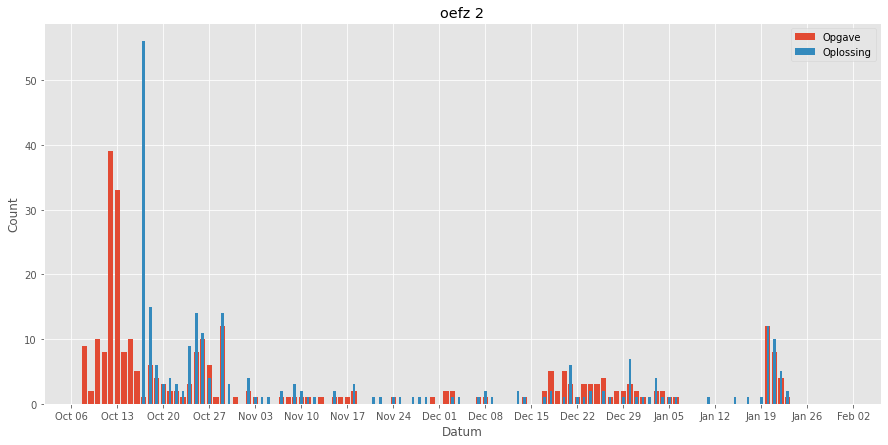

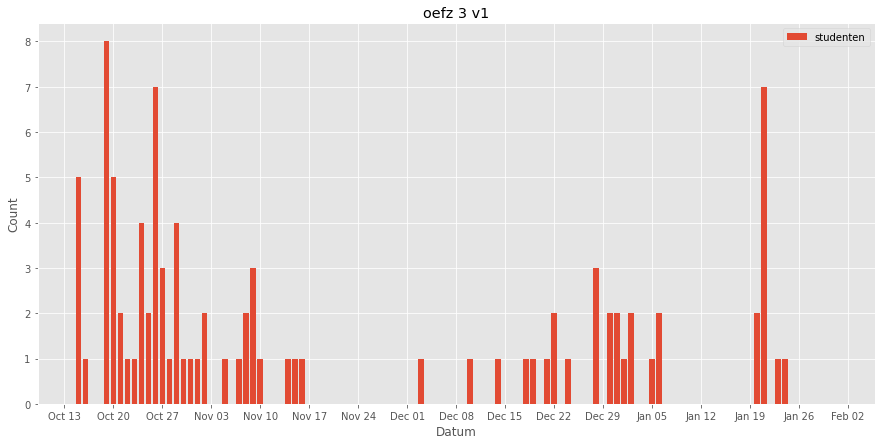

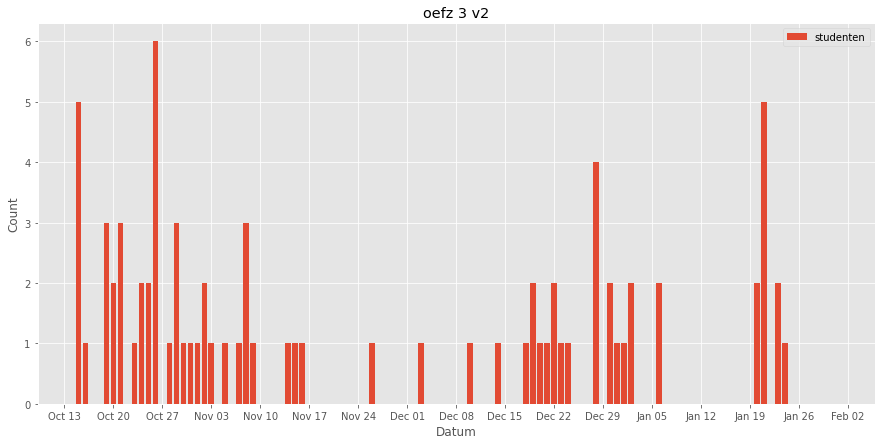

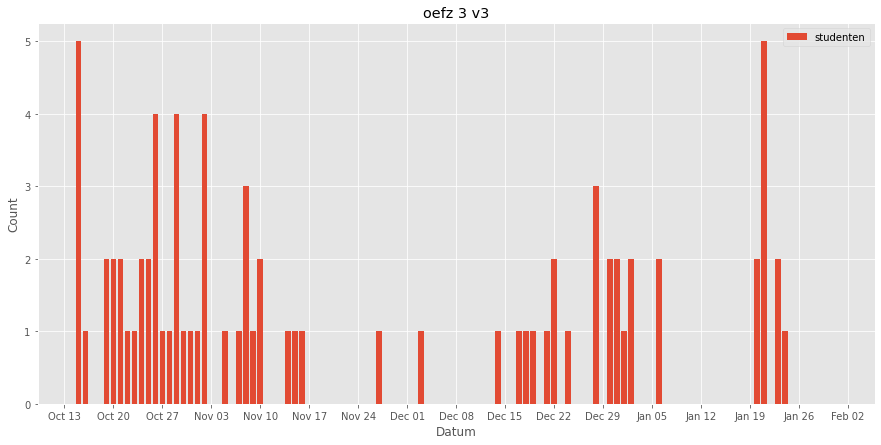

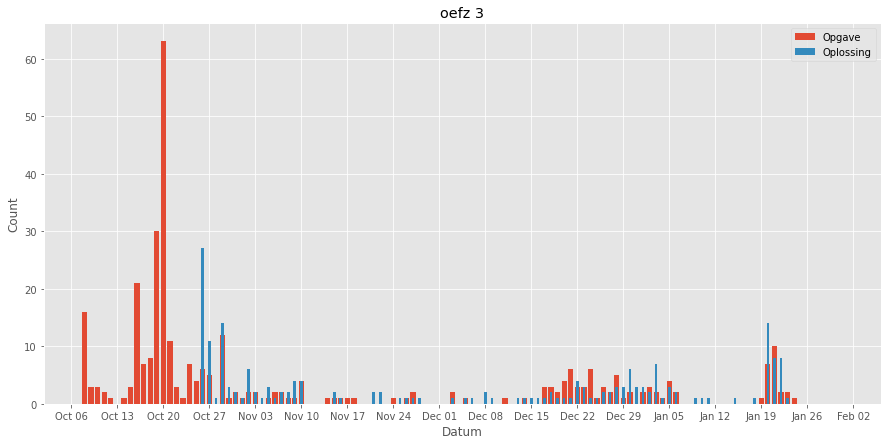

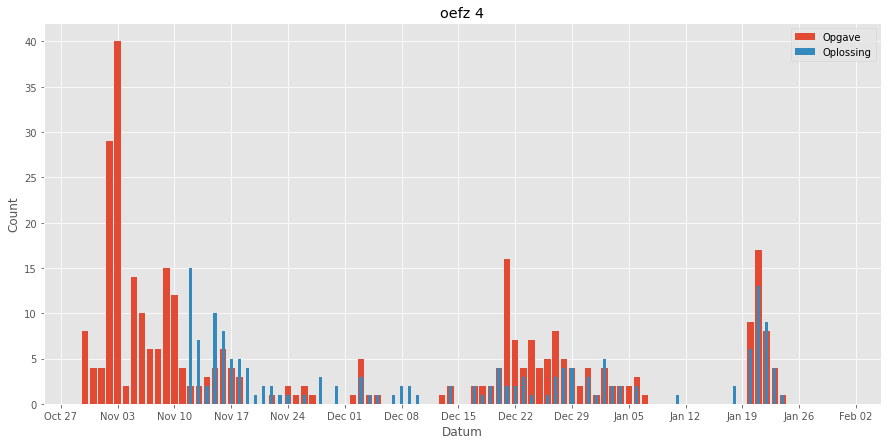

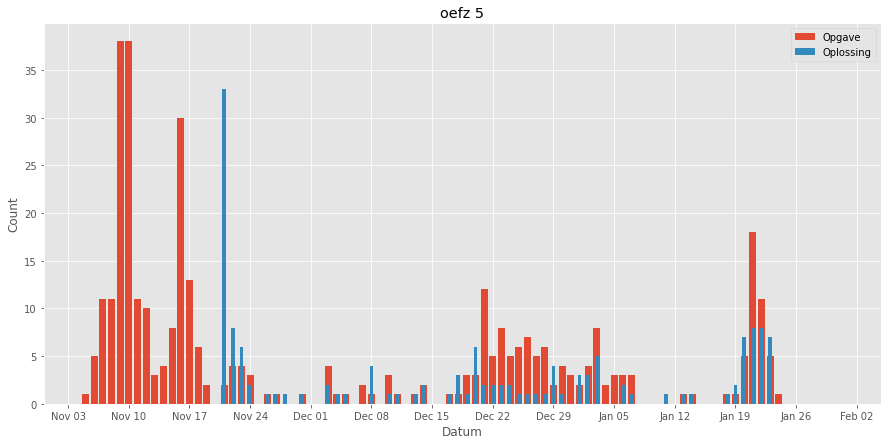

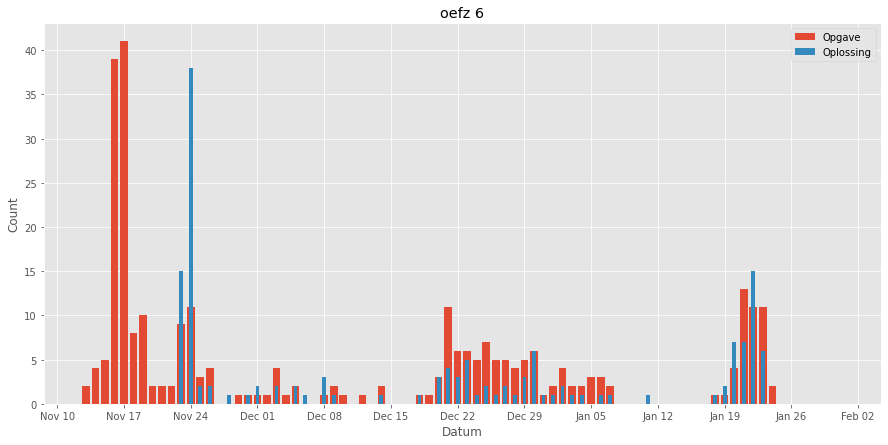

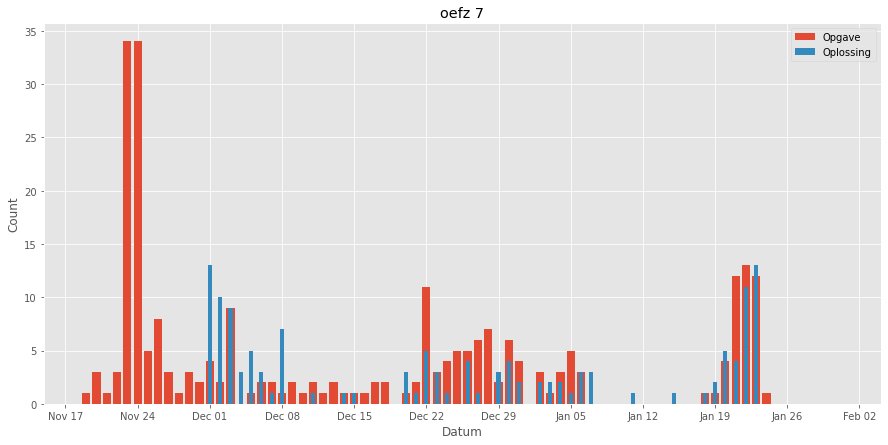

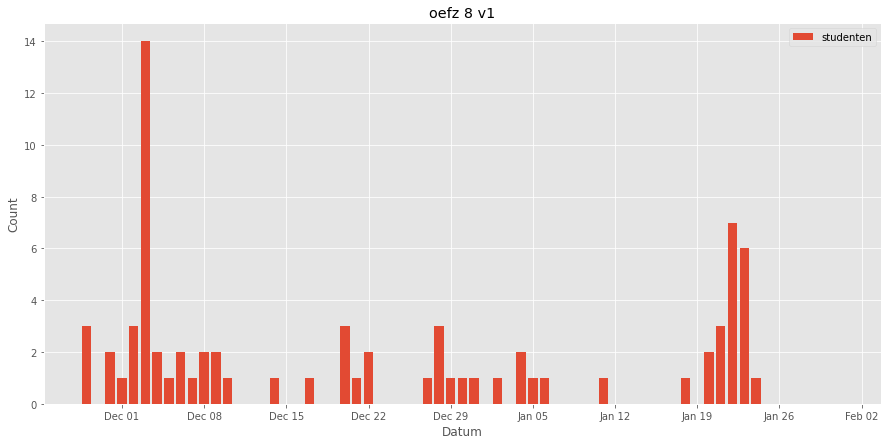

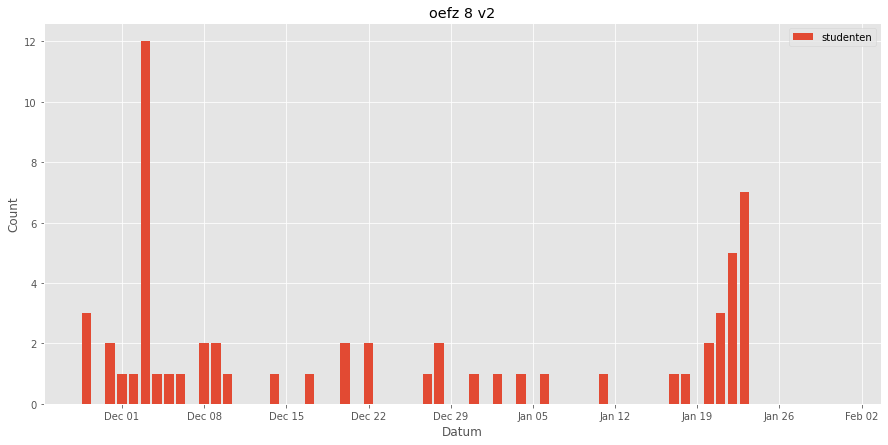

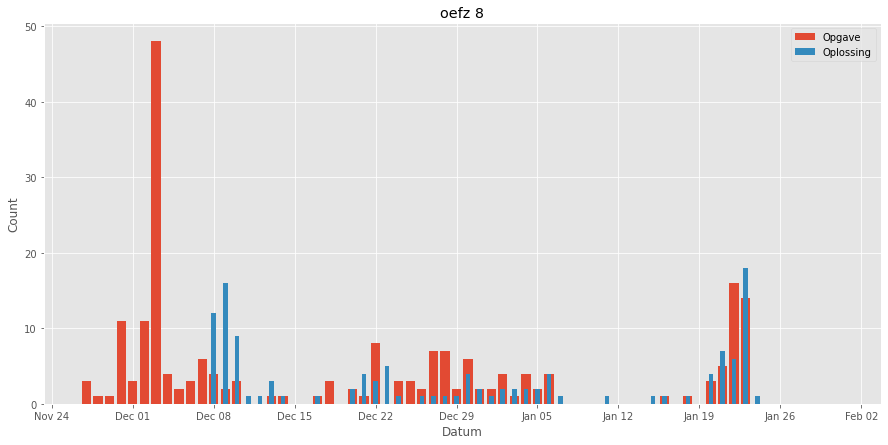

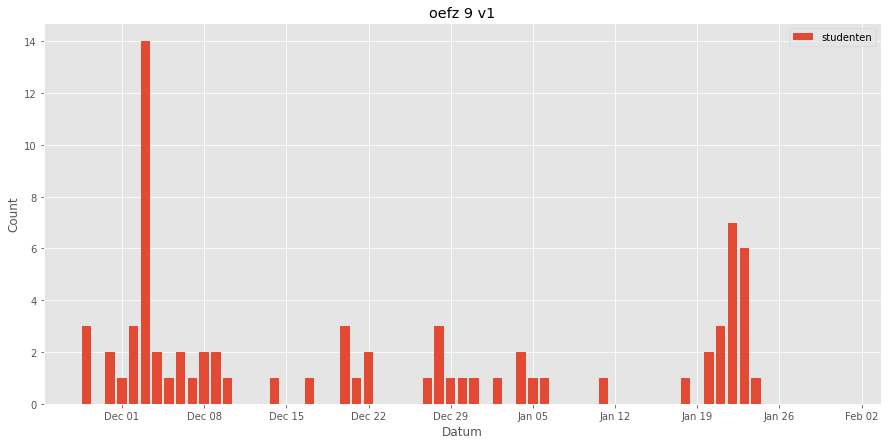

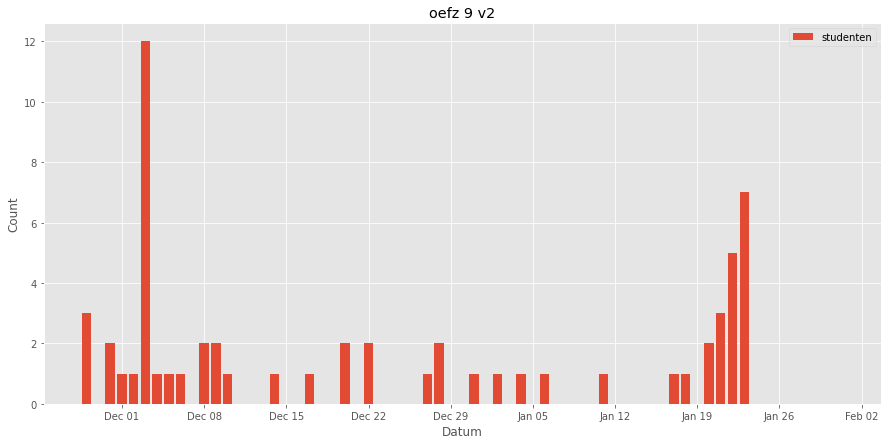

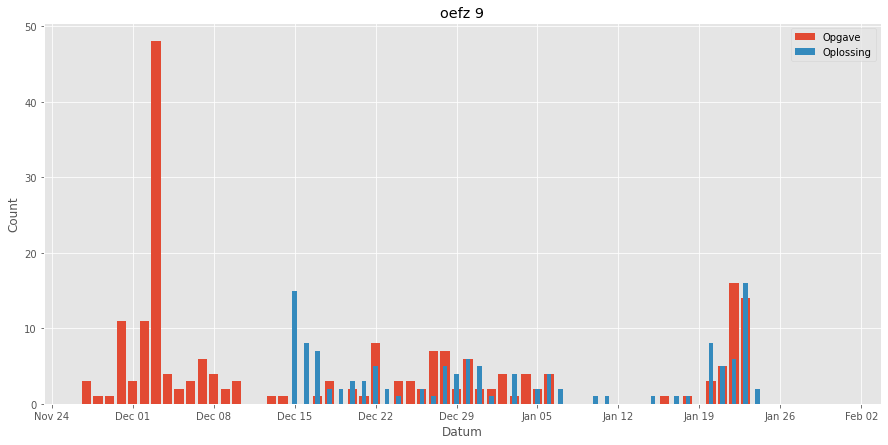

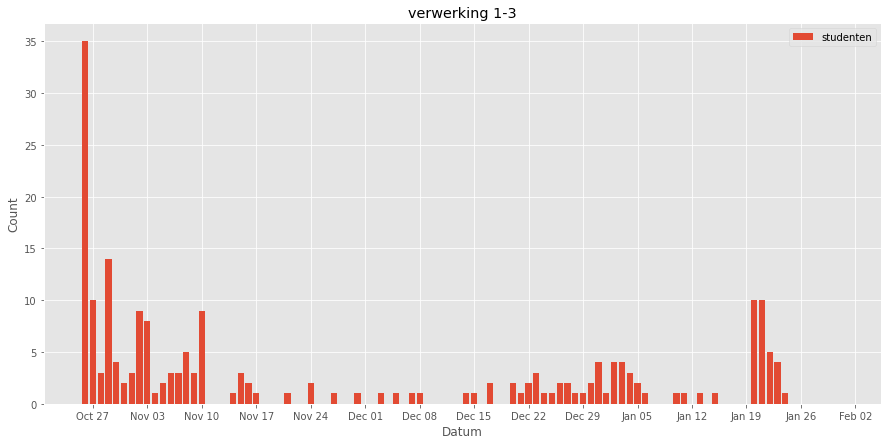

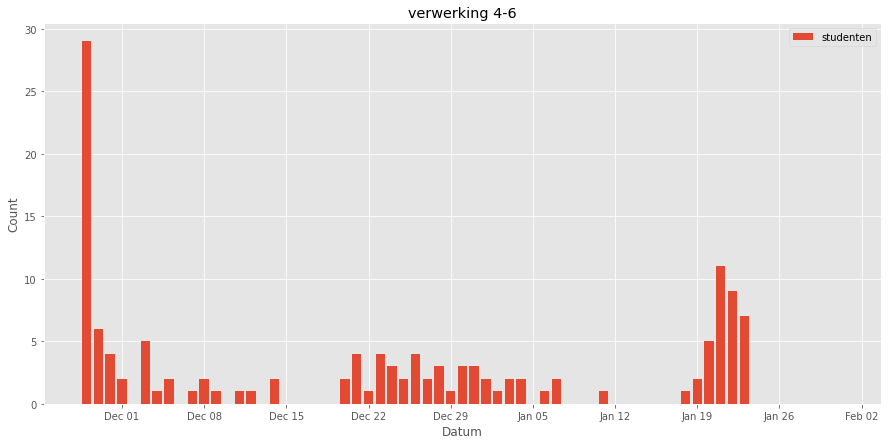

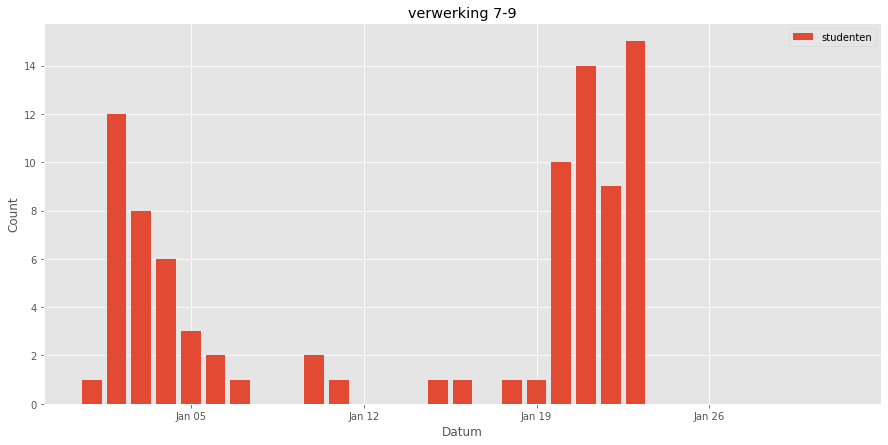

In [ ]:
plotAllAtLocationWithDoubles('Opdrachten 1bira', 10, 'opl ')

#Conclusies statistieken opdrachten 1Bira
We kunnen ongeveer dezelfde conclusies trekken als in de andere groep.


*   De video's krijgen zeer weinig aandacht.
*   Ook de opgaves worden vooral bekeken in de week van de oefenzitting, maar bij deze groep zien we minder hoge interesse gedurende de examenperiode.
* Hier blijkt wel dat er grote aantallen studenten de modeloplossingen raadplegen wanneer deze pas online komen.
* Wat betreft de verwerking zien we dat er weinig interesse is in deze groep. 



#Statistieken Externe Informatie


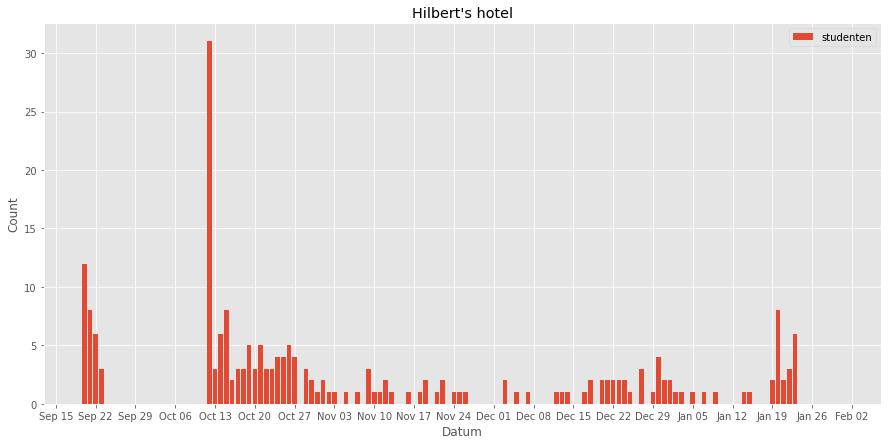

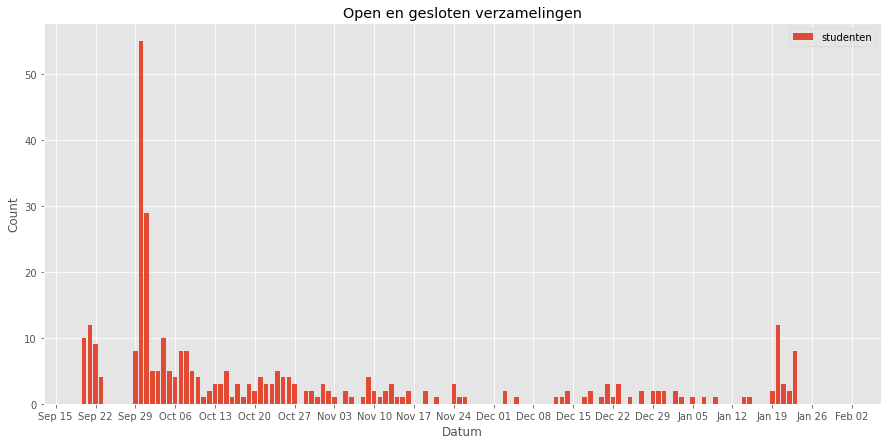

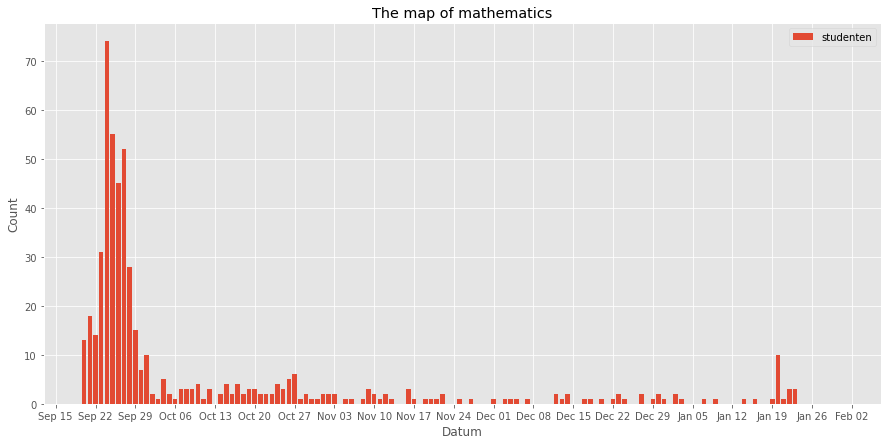

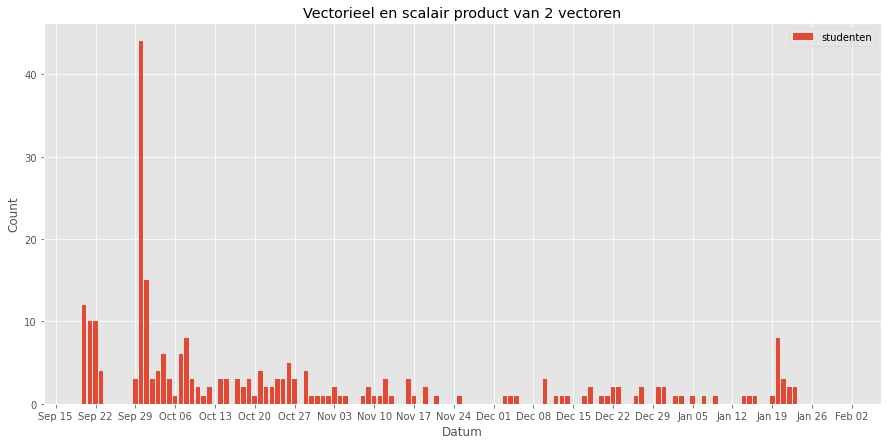

In [ ]:
plotAllAtLocation("Externe informatie")

#Conclusie Externe Informatie
We zien in interesse in het begin van het semester, maar doorheen het semester wordt dit enkel bezocht door de enkeling die wat afleiding van de cursus zoekt.


#Algemene conclusies en antwoorden op onderzoeksvragen.
###Hoe goed bereiden studenten zich voor op de oefenzittingen?
Uit de gegevens blijkt dat de studenten zich in de week van de oefenzitting weldegelijk verdiepen in de oefeningen of dit reeds de dag voor een oefenzitting is of tijdens de oefenzitting zelf is moeilijk te zeggen aangezien ik de exacte dagen waarop de oefenzittingen gegeven werden niet heb en deze waarschijnlijk toch gespreid zijn over de hele week.

###Hoe goed bereiden studenten zich voor in flipped teaching?
Ik vermoed dat hier dezelfde conclusie getrokken kan worden als hierboven.

###Welke items worden wanneer bekeken (is dit geconcentreerd of verspreid) en welke items worden systematisch minder geconsulteerd door studenten.
Dit wordt reeds uitgebreid besproken in de verschillende deelsecties.

###Wat wordt niet of zelden bekeken?
Voornamelijk de video's bij de oefenzittingen liggen minder in de belangstelling, hiernaast worden ook de video's in de map Externe Informatie niet veel bekeken, wat waarschijnlijk te verklaren valt doordat dit geen leerstof is. 
Ook sommige opnames van hoorcolleges worden minder bekeken. Is er een periode geweest waarin de lessen live gegeven werden waardoor dit verklaard kan worden?

###Aan welke leervorm spenderen de studenten de meeste tijd en verandert dit patroon tijdens het semester?
De studenten spenderen doorheen het semester de meeste tijd aan de oefenzittingen en van sommige lessen ook de hoorcolleges. Ook de TTT vragen krijgen veel interesse in de periode van de TTT's, deze worden verder in het semester slechts weinig bekeken. 
In de examenperiode zien we echter dat vooral de oude examenvragen toenemen in populariteit en als goede bron dienen bij het studeren voor het examen.
